In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='poster', font_scale=0.9,
            rc={'xtick.major.size': 3,
                'ytick.major.size': 3,
                'xtick.major.width': 1,
                'ytick.major.width': 1,
                'xtick.major.pad': 3.5,
                'ytick.major.pad': 3.5,
                'axes.linewidth': 1,
                'lines.linewidth': 2,
               })

from src.parameters import PROCESSED_DATA_DIR, ANIMALS, COLORS
from loren_frank_data_processing import make_epochs_dataframe, read_analysis_files

In [3]:
epoch_info = make_epochs_dataframe(ANIMALS)
epoch_info = epoch_info.loc[
    (epoch_info.type == 'run') &
    (epoch_info.environment != 'lin')]
epoch_keys = epoch_info.index

In [4]:
def preprocess(ds):
    return ds.drop(['start_time', 'end_time'])

replay_info = (
    xr.open_mfdataset(
        '../Processed-Data/*.nc', group='/replay_info').to_dataframe()
    .set_index(['animal', 'day', 'epoch', 'ripple_number']))

In [5]:
replay_info.head()

start_time        end_time  \
animal day epoch ripple_number                                   
Cor    1   2     1             00:22:39.771535 00:22:39.809535   
                 2             00:23:08.197537 00:23:08.275537   
                 3             00:23:21.014872 00:23:21.102872   
                 4             00:23:21.862205 00:23:21.910205   
                 5             00:23:22.428205 00:23:22.490205   

                                ripple_duration   predicted_state  \
animal day epoch ripple_number                                      
Cor    1   2     1                        0.038   Inbound-Reverse   
                 2                        0.078   Inbound-Forward   
                 3                        0.088  Outbound-Reverse   
                 4                        0.048      Unclassified   
                 5                        0.062  Outbound-Forward   

                                predicted_state_probability   replay_task  \
animal day epoch ripple_number                                              
Cor    1   2     1                                 0.802490       Inbound   
                 2                                 0.839140       Inbound   
                 3                                 0.848830      Outbound   
                 4                                      NaN  Unclassified   
                 5                                 0.807346      Outbound   

                               replay_order session_time  \
animal day epoch ripple_number                             
Cor    1   2     1                  Reverse        early   
                 2                  Forward        early   
                 3                  Reverse        early   
                 4                                 early   
                 5                  Forward        early   

                                number_of_unique_spiking  number_of_spikes  \
animal day epoch ripple_number                                               
Cor    1   2     1                                    10                21   
                 2                                     8                41   
                 3                                     9               131   
                 4                                     9                35   
                 5                                    10                76   

                                    ...        from_well to_well      task  \
animal day epoch ripple_number      ...                                      
Cor    1   2     1                  ...           center  center  Outbound   
                 2                  ...           center  center  Outbound   
                 3                  ...                                      
                 4                  ...                                      
                 5                  ...                                      

                               is_correct  x_position  y_position  \
animal day epoch ripple_number                                      
Cor    1   2     1                    1.0      279.30      169.86   
                 2                    1.0      291.84      123.12   
                 3                    NaN      279.30      198.36   
                 4                    NaN      279.30      198.36   
                 5                    NaN      279.30      198.36   

                                head_direction     speed  linear_distance  \
animal day epoch ripple_number                                              
Cor    1   2     1                   -1.965587  2.705046        24.440612   
                 2                   -1.350694  3.497918        80.939056   
                 3                    1.570796  0.023083         0.000000   
                 4                    1.570796  0.169108         0.000000   
                 5                    1.570796  0.127815         0.000000   

          

In [6]:
replay_info = replay_info.reset_index('ripple_number').join(epoch_info).set_index('ripple_number', append=True)
replay_info.head()

start_time        end_time  \
animal day epoch ripple_number                                   
Cor    1   2     1             00:22:39.771535 00:22:39.809535   
                 2             00:23:08.197537 00:23:08.275537   
                 3             00:23:21.014872 00:23:21.102872   
                 4             00:23:21.862205 00:23:21.910205   
                 5             00:23:22.428205 00:23:22.490205   

                                ripple_duration   predicted_state  \
animal day epoch ripple_number                                      
Cor    1   2     1                        0.038   Inbound-Reverse   
                 2                        0.078   Inbound-Forward   
                 3                        0.088  Outbound-Reverse   
                 4                        0.048      Unclassified   
                 5                        0.062  Outbound-Forward   

                                predicted_state_probability   replay_task  \
animal day epoch ripple_number                                              
Cor    1   2     1                                 0.802490       Inbound   
                 2                                 0.839140       Inbound   
                 3                                 0.848830      Outbound   
                 4                                      NaN  Unclassified   
                 5                                 0.807346      Outbound   

                               replay_order session_time  \
animal day epoch ripple_number                             
Cor    1   2     1                  Reverse        early   
                 2                  Forward        early   
                 3                  Reverse        early   
                 4                                 early   
                 5                  Forward        early   

                                number_of_unique_spiking  number_of_spikes  \
animal day epoch ripple_number                                               
Cor    1   2     1                                    10                21   
                 2                                     8                41   
                 3                                     9               131   
                 4                                     9                35   
                 5                                    10                76   

                                  ...     is_correct x_position y_position  \
animal day epoch ripple_number    ...                                        
Cor    1   2     1                ...            1.0     279.30     169.86   
                 2                ...            1.0     291.84     123.12   
                 3                ...            NaN     279.30     198.36   
                 4                ...            NaN     279.30     198.36   
                 5                ...            NaN     279.30     198.36   

                               head_direction     speed  linear_distance  \
animal day epoch ripple_number                                             
Cor    1   2     1                  -1.965587  2.705046        24.440612   
                 2                  -1.350694  3.497918        80.939056   
                 3                   1.570796  0.023083         0.000000   
                 4                   1.570796  0.169108         0.000000   
                 5                   1.570796  0.127815         0.000000   

                                replay_motion  environment  type  exposure  
animal day epoch ripple_number                                              
Cor    1   2     1                       Away       TrackA   run       1.0  
                 2                       Away       TrackA   run       1.0  
                 3                    Towards       TrackA   run       1.0  
                 4                    Towards       TrackA   run       1.0  
                 5                    T

In [7]:
replay_info['session_time'] = pd.Categorical(
    replay_info.session_time, ordered=True,
    categories=['early', 'middle', 'late'])

## Over animals

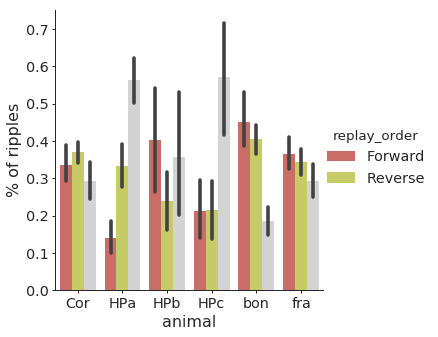

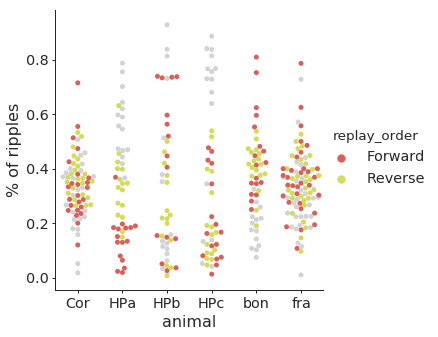

In [8]:
covariate = 'replay_order'
COLORS[''] = 'lightgrey'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index())

sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               palette=COLORS, size=5, kind='bar');
sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               kind='swarm', palette=COLORS, size=5);

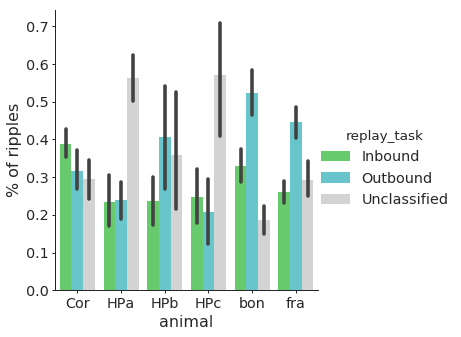

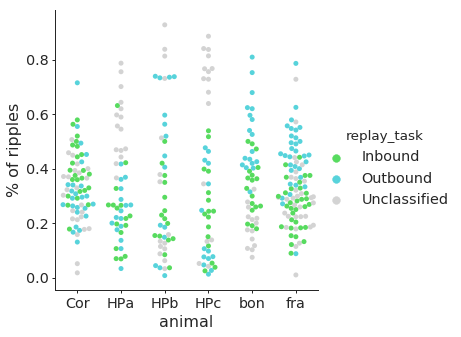

In [9]:
covariate = 'replay_task'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index())

sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               palette=COLORS, size=5, kind='bar');
sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               kind='swarm', palette=COLORS, size=5);

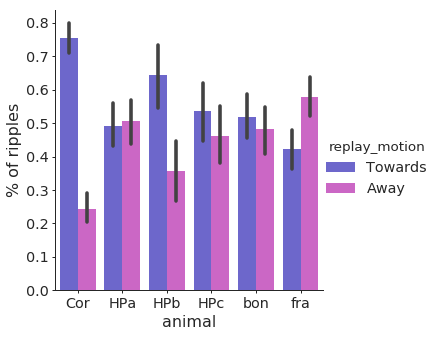

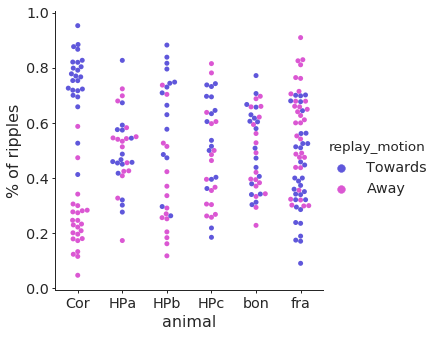

In [10]:
covariate = 'replay_motion'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index())

sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               palette=COLORS, size=5, kind='bar');
sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               kind='swarm', palette=COLORS, size=5);

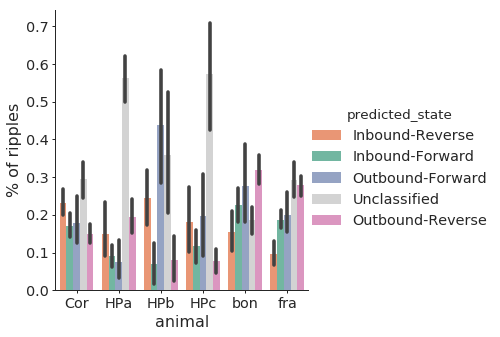

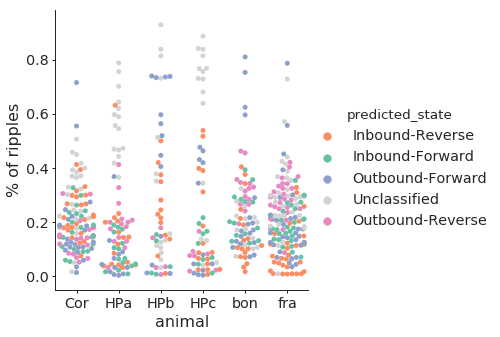

In [11]:
covariate = 'predicted_state'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index())

sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               palette=COLORS, size=5, kind='bar');
sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               kind='swarm', palette=COLORS, size=5);

## Over Epochs

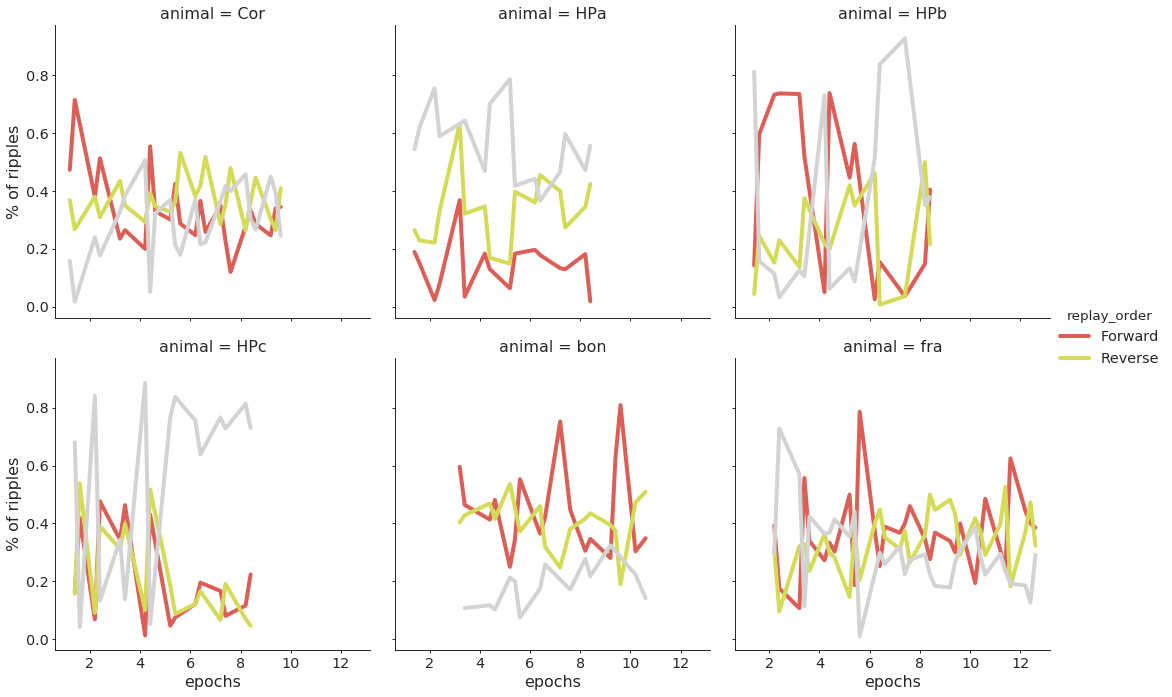

In [12]:
covariate = 'replay_order'
replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index()
 .assign(epochs=lambda df: df.day + df.epoch * 0.1))


g = sns.FacetGrid(data=replay_percentage, col='animal', col_wrap=3,
                  hue=covariate, palette=COLORS, size=5)

g = g.map(plt.plot, 'epochs', '% of ripples', linewidth=4)
g.add_legend();

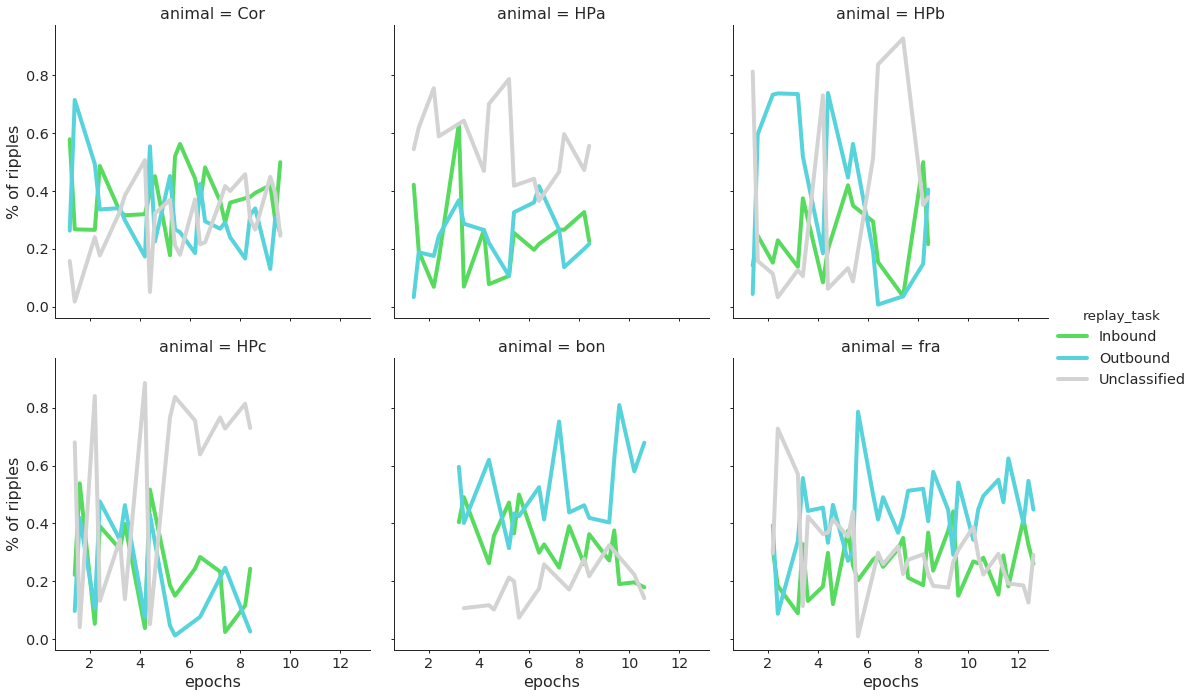

In [13]:
covariate = 'replay_task'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
  .reset_index()
 .assign(epochs=lambda df: df.day + df.epoch * 0.1))


g = sns.FacetGrid(data=replay_percentage, col='animal', col_wrap=3,
                  hue=covariate, palette=COLORS, size=5)
g = g.map(plt.plot, 'epochs', '% of ripples', linewidth=4)
g.add_legend();

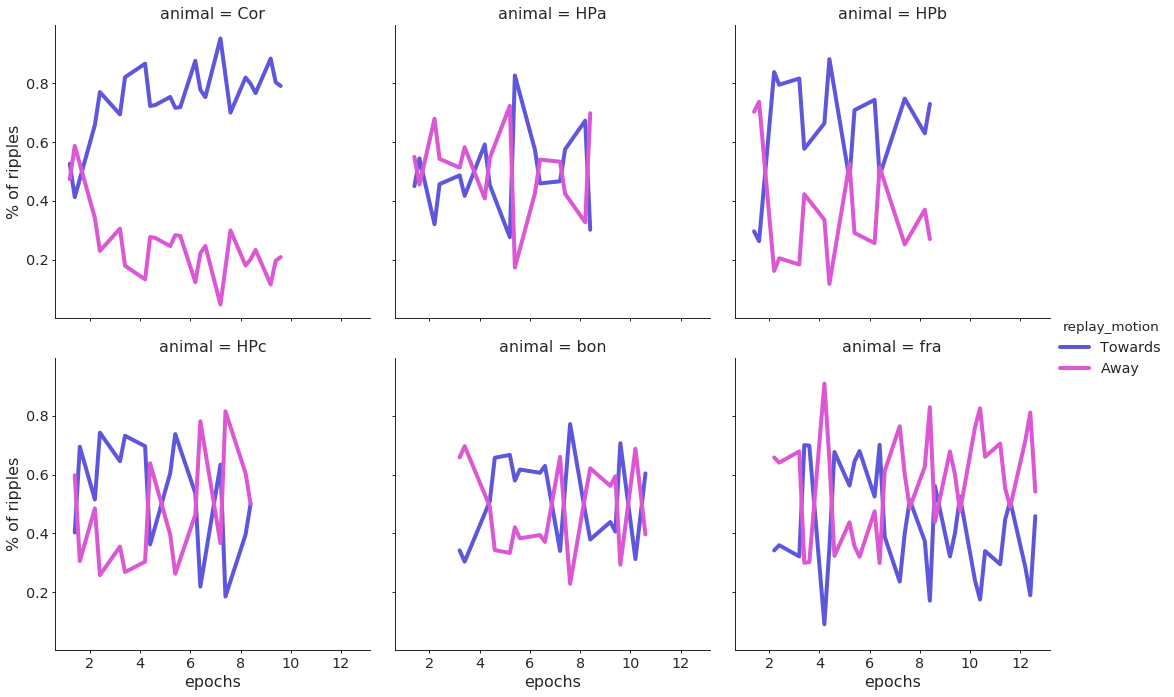

In [14]:
covariate = 'replay_motion'
replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
  .reset_index()
 .assign(epochs=lambda df: df.day + df.epoch * 0.1))


g = sns.FacetGrid(data=replay_percentage, col='animal', col_wrap=3,
                  hue=covariate, palette=COLORS, size=5)
g = g.map(plt.plot, 'epochs', '% of ripples', linewidth=4)
g.add_legend();

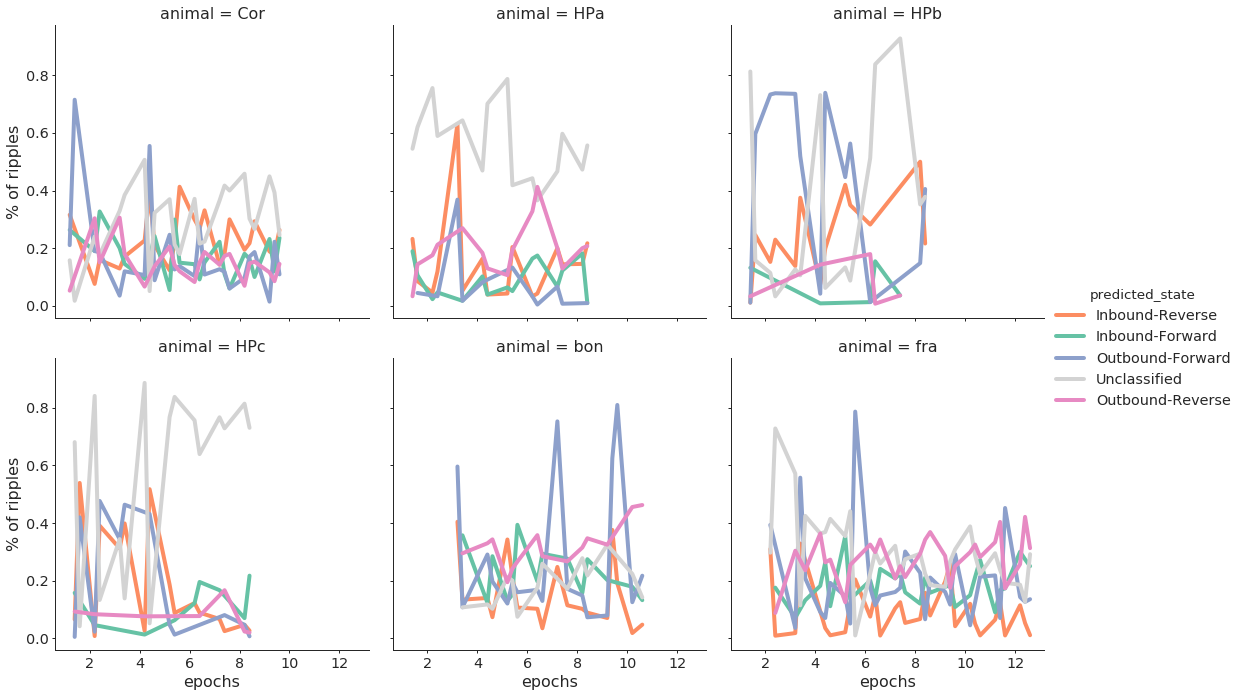

In [15]:
covariate = 'predicted_state'
replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
  .reset_index()
 .assign(epochs=lambda df: df.day + df.epoch * 0.1))


g = sns.FacetGrid(data=replay_percentage, col='animal', col_wrap=3,
                  hue=covariate, palette=COLORS, size=5)
g = g.map(plt.plot, 'epochs', '% of ripples', linewidth=4)
g.add_legend();

## Over Exposures

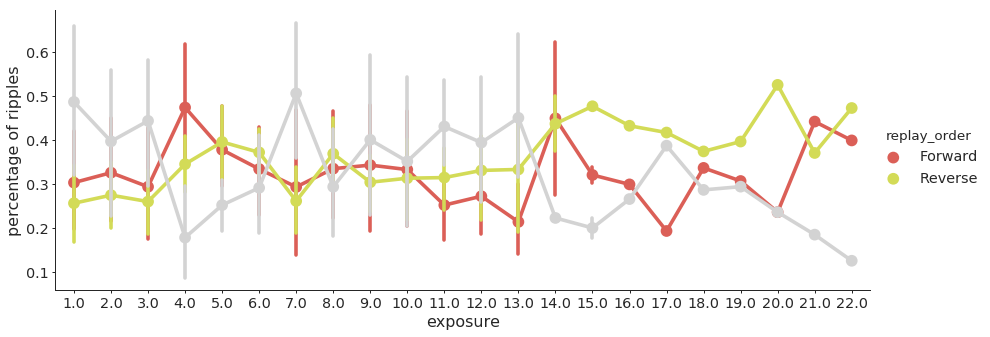

In [16]:
covariate = 'replay_order'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, palette=COLORS, size=5, aspect=2.5);

In [17]:
(replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index(covariate).join(epoch_info).reset_index())

animal  day  epoch replay_order  percentage of ripples environment type  \
0      Cor    1      2      Forward               0.473684      TrackA  run   
1      Cor    1      2      Reverse               0.368421      TrackA  run   
2      Cor    1      2                            0.157895      TrackA  run   
3      Cor    1      4      Forward               0.715116      TrackA  run   
4      Cor    1      4      Reverse               0.267442      TrackA  run   
5      Cor    1      4                            0.017442      TrackA  run   
6      Cor    2      2      Forward               0.379747      TrackA  run   
7      Cor    2      2      Reverse               0.379747      TrackA  run   
8      Cor    2      2                            0.240506      TrackA  run   
9      Cor    2      4      Forward               0.513274      TrackA  run   
10     Cor    2      4      Reverse               0.309735      TrackA  run   
11     Cor    2      4                            0.176991      TrackA  run   
12     Cor    3      2      Reverse               0.435294      TrackA  run   
13     Cor    3      2                            0.329412      TrackA  run   
14     Cor    3      2      Forward               0.235294      TrackA  run   
15     Cor    3      4                            0.384615      TrackA  run   
16     Cor    3      4      Reverse               0.350427      TrackA  run   
17     Cor    3      4      Forward               0.264957      TrackA  run   
18     Cor    4      2                            0.506667      TrackA  run   
19     Cor    4      2      Reverse               0.293333      TrackA  run   
20     Cor    4      2      Forward               0.200000      TrackA  run   
21     Cor    4      4      Forward               0.554745      TrackB  run   
22     Cor    4      4      Reverse               0.394161      TrackB  run   
23     Cor    4      4                            0.051095      TrackB  run   
24     Cor    4      6      Reverse               0.346774      TrackB  run   
25     Cor    4      6      Forward               0.330645      TrackB  run   
26     Cor    4      6                            0.322581      TrackB  run   
27     Cor    5      2                            0.369863      TrackA  run   
28     Cor    5      2      Reverse               0.328767      TrackA  run   
29     Cor    5      2      Forward               0.301370      TrackA  run   
..     ...  ...    ...          ...                    ...         ...  ...   
328    fra    9      6      Forward               0.400000      TrackA  run   
329    fra    9      6                            0.308333      TrackA  run   
330    fra    9      6      Reverse               0.291667      TrackA  run   
331    fra   10      2      Reverse               0.417910      TrackB  run   
332    fra   10      2                            0.388060      TrackB  run   
333    fra   10      2      Forward               0.194030      TrackB  run   
334    fra   10      4      Reverse               0.375000      TrackB  run   
335    fra   10      4      Forward               0.337500      TrackB  run   
336    fra   10      4                            0.287500      TrackB  run   
337    fra   10      6      Forward               0.485437      TrackA  run   
338    fra   10      6      Reverse               0.291262      TrackA  run   
339    fra   10      6                            0.223301      TrackA  run   
340    fra   11      2      Reverse               0.397436      TrackB  run   
341    fra   11      2      Forward               0.307692      TrackB  run   
342    fra   11      2                            0.294872      TrackB  run   
343    fra   11      4      Reverse               0.526316      TrackB  run   
344    fra   11      4                            0.236842      TrackB  run   
345    fra   11      4      Forward               0.236842      TrackB  run   
346    fra   11      6      Forward               0.62

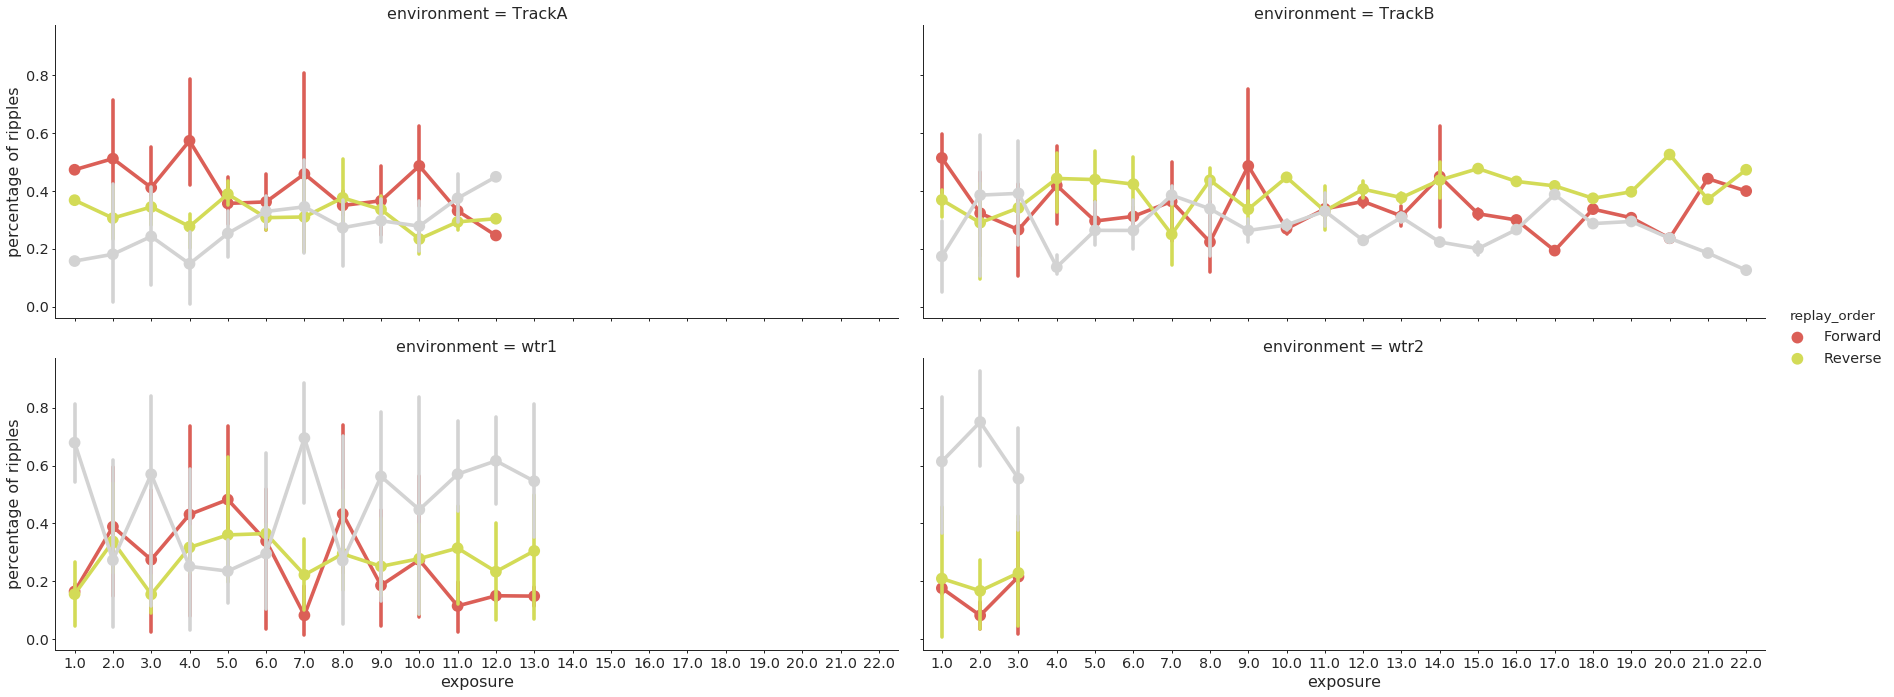

In [18]:
covariate = 'replay_order'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index(covariate).join(epoch_info).reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, palette=COLORS, size=5, aspect=2.5, col='environment', col_wrap=2);

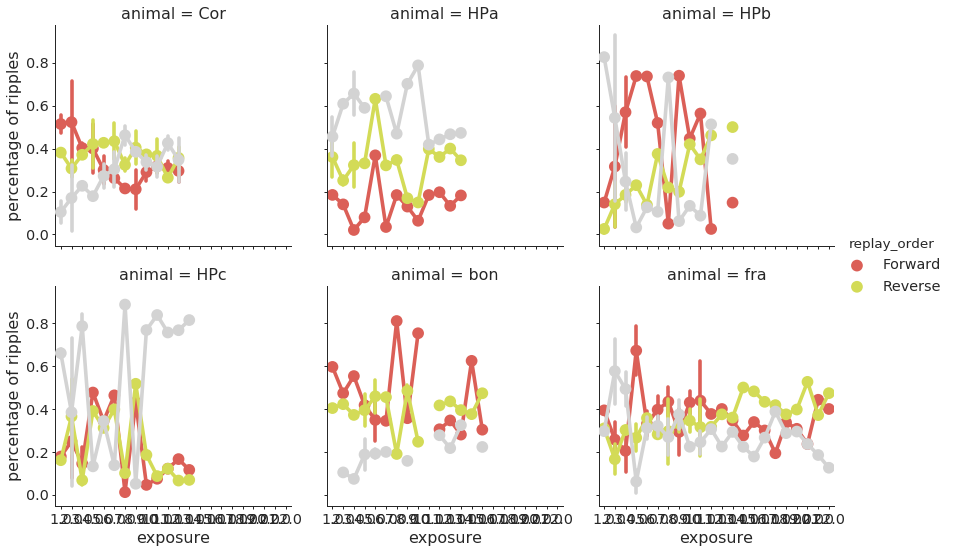

In [19]:
covariate = 'replay_order'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, col='animal', col_wrap=3, palette=COLORS);

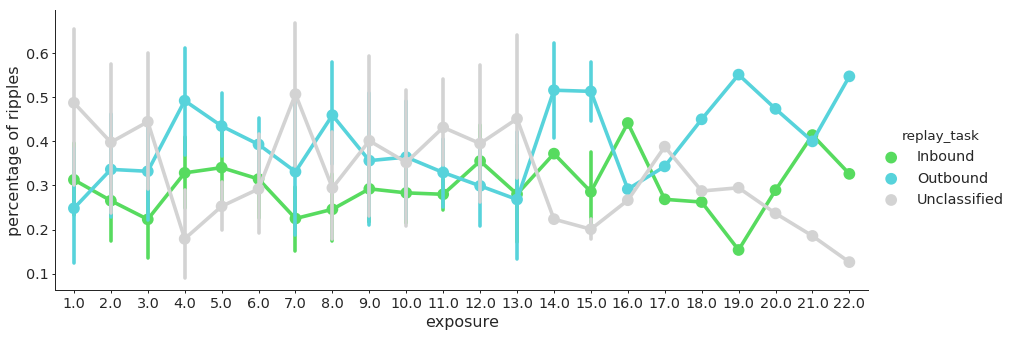

In [20]:
covariate = 'replay_task'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, palette=COLORS, size=5, aspect=2.5);

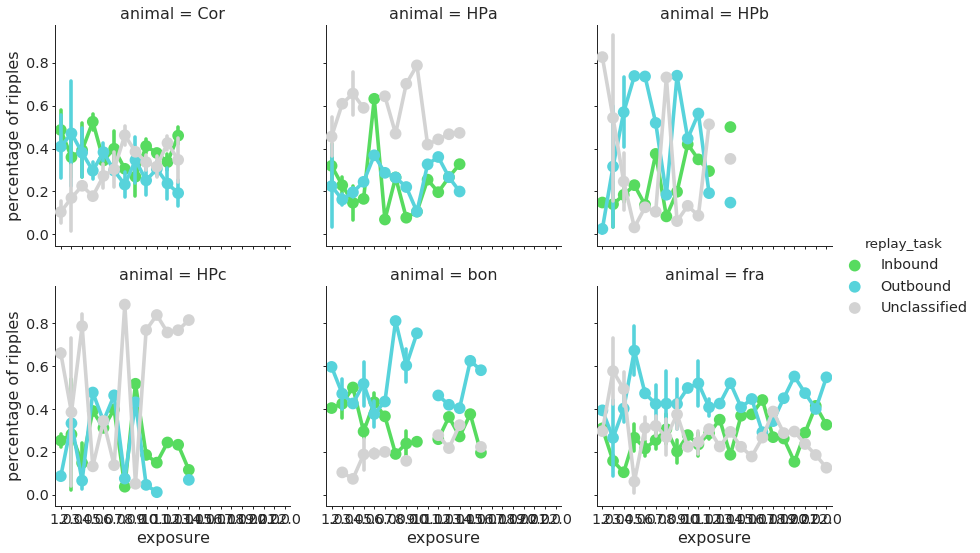

In [21]:
covariate = 'replay_task'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, col='animal', col_wrap=3, palette=COLORS);

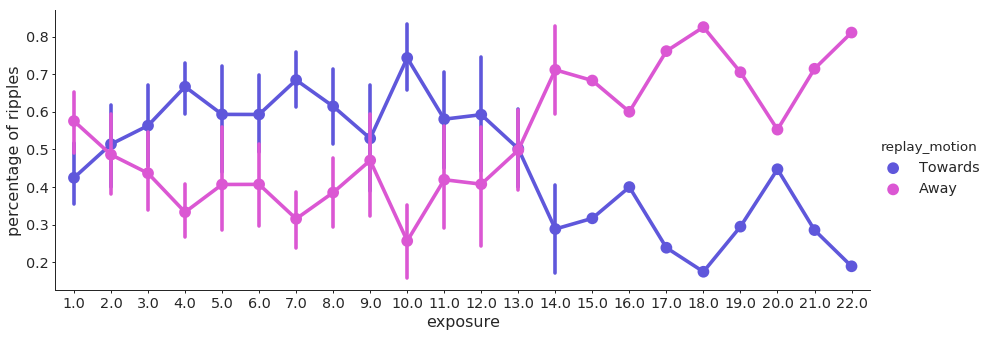

In [22]:
covariate = 'replay_motion'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, palette=COLORS, size=5, aspect=2.5);

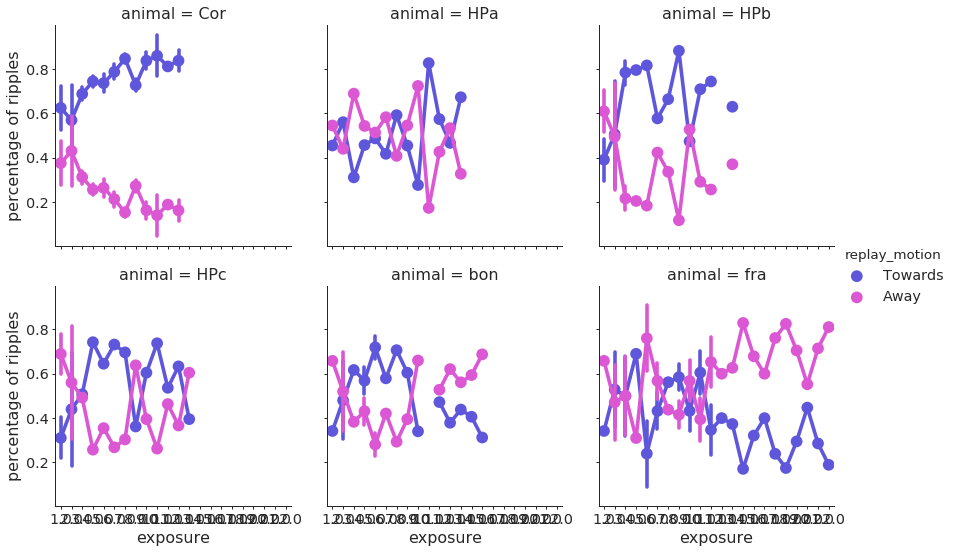

In [23]:
covariate = 'replay_motion'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, col='animal', col_wrap=3, palette=COLORS);

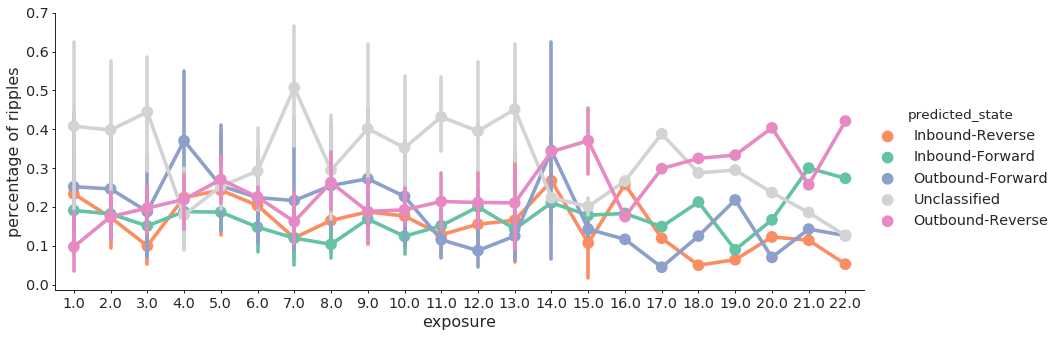

In [24]:
covariate = 'predicted_state'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, palette=COLORS, size=5, aspect=2.5);

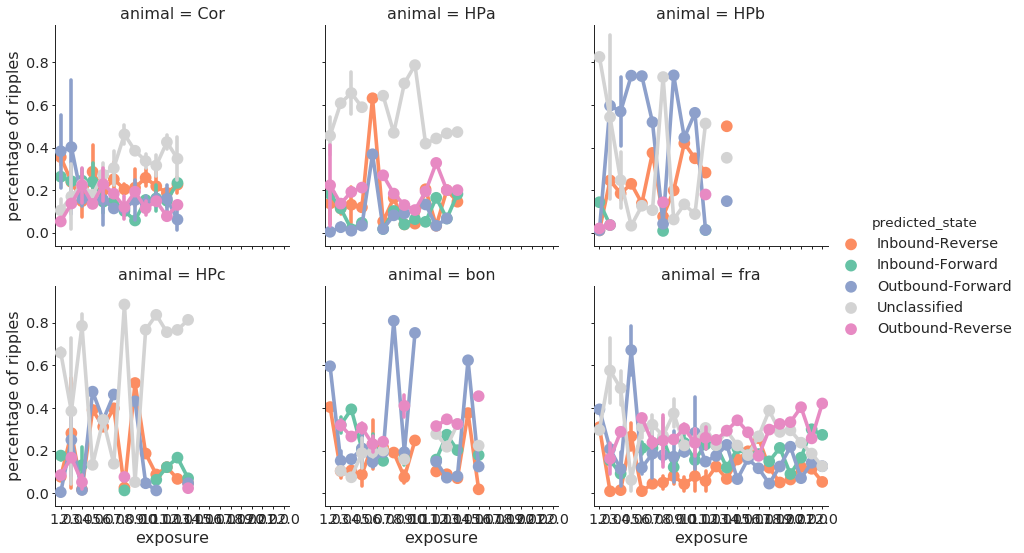

In [25]:
covariate = 'predicted_state'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'exposure'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='exposure', y='percentage of ripples',
               hue=covariate, col='animal', col_wrap=3, palette=COLORS);

## Within session

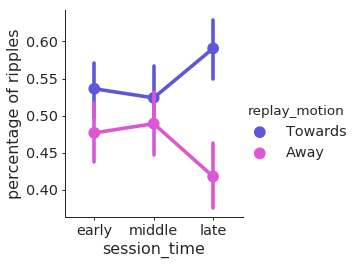

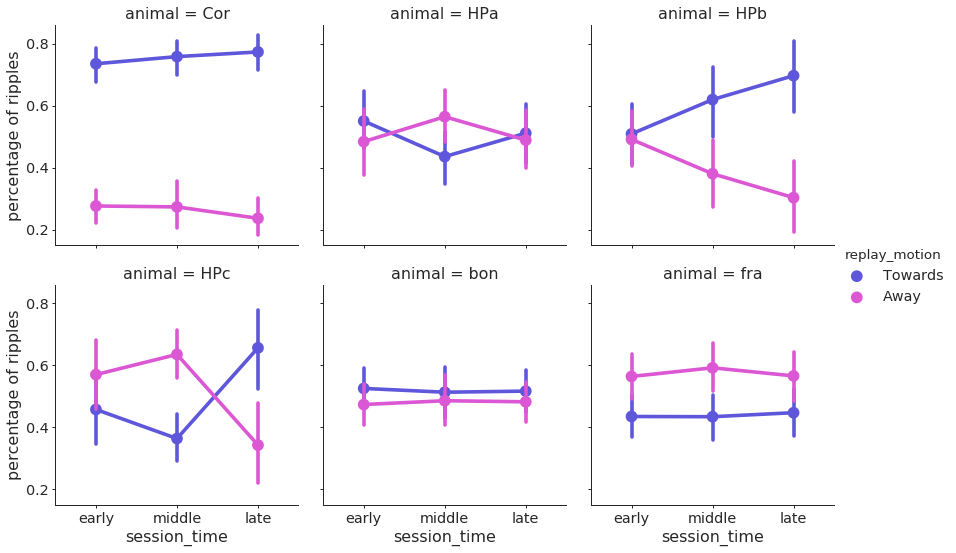

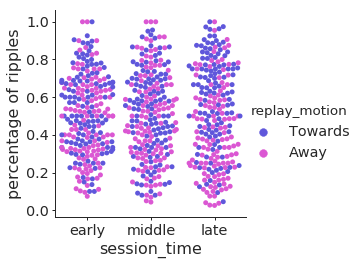

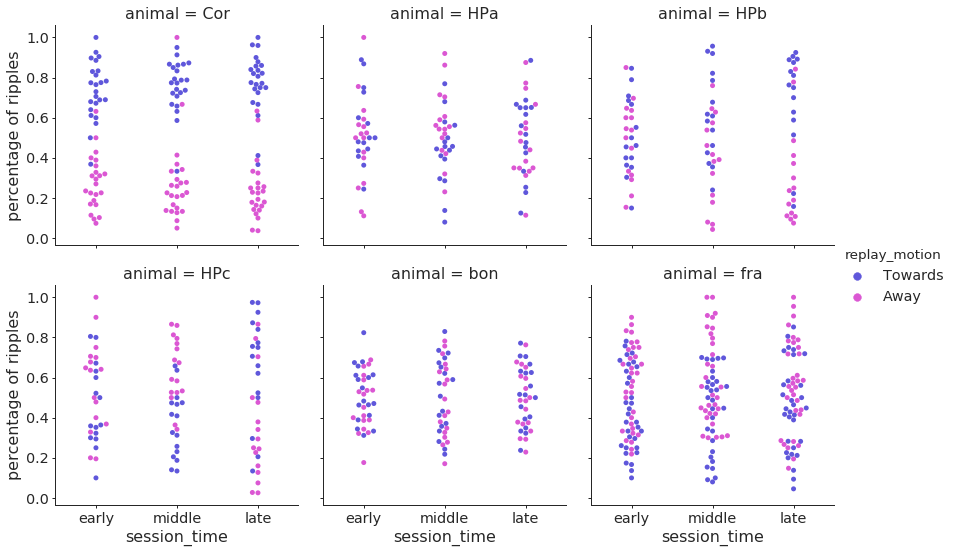

In [26]:
covariate = 'replay_motion'
percentage_of_ripples = (replay_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate, palette=COLORS);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', palette=COLORS, col_wrap=3);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               kind='swarm', palette=COLORS);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', col_wrap=3, kind='swarm', palette=COLORS);

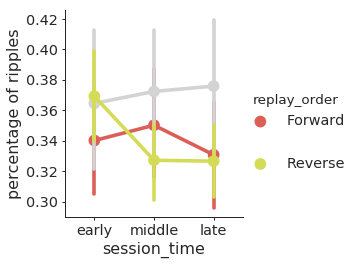

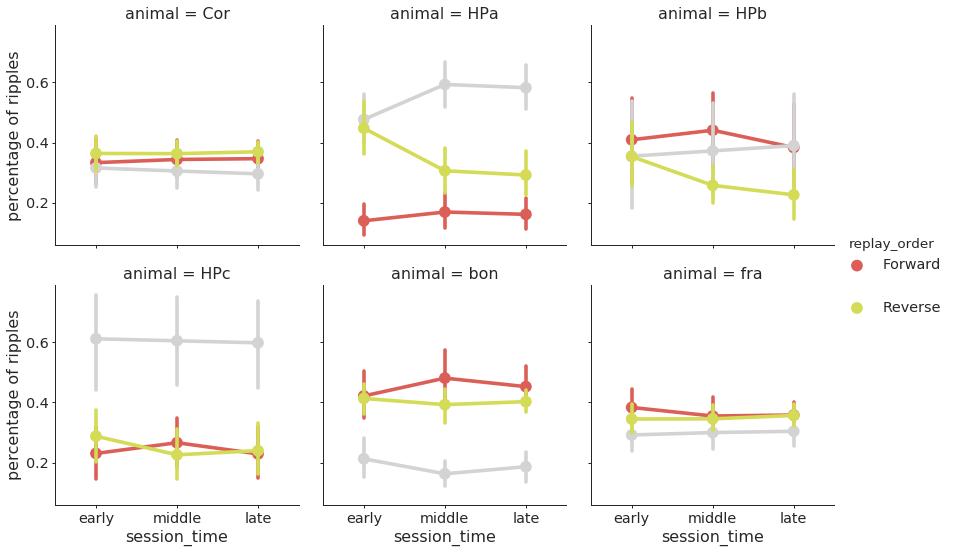

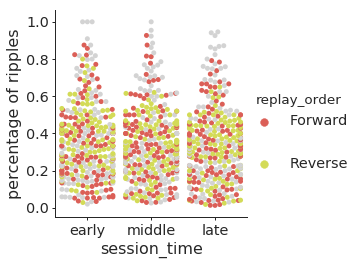

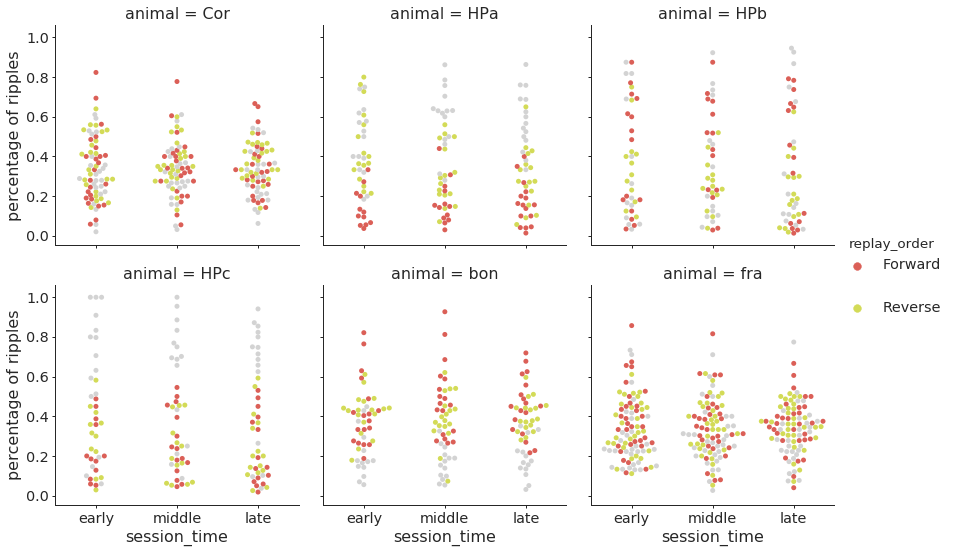

In [27]:
covariate = 'replay_order'
percentage_of_ripples = (replay_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate, palette=COLORS);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', palette=COLORS, col_wrap=3);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               kind='swarm', palette=COLORS);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', col_wrap=3, kind='swarm', palette=COLORS);

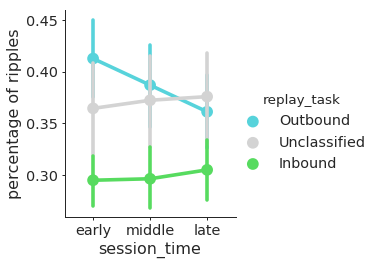

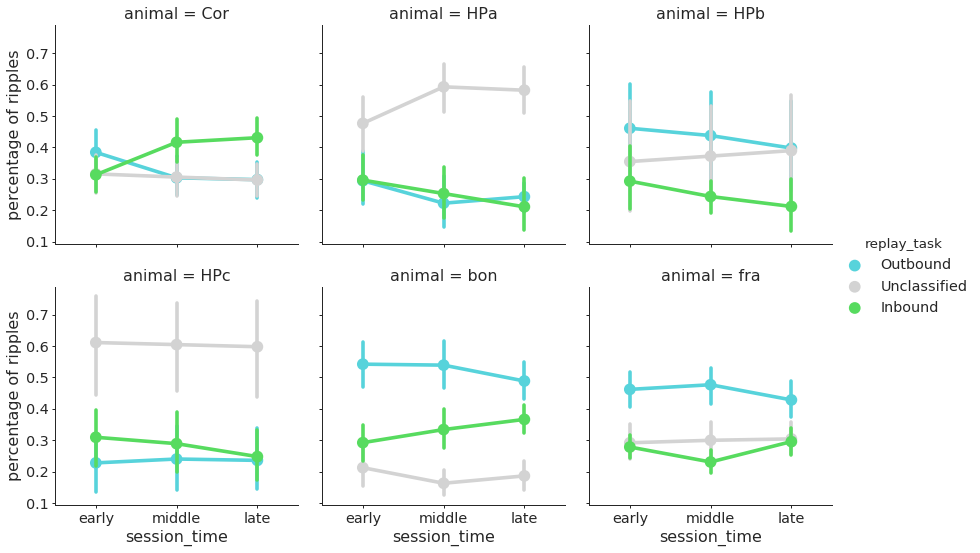

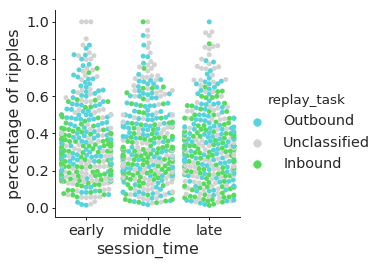

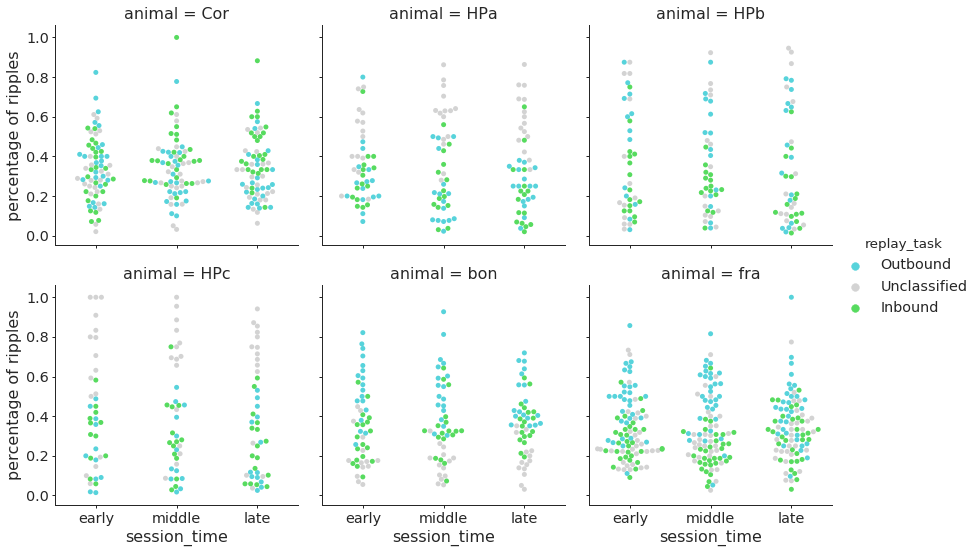

In [28]:
covariate = 'replay_task'
percentage_of_ripples = (replay_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate, palette=COLORS);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', palette=COLORS, col_wrap=3);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               kind='swarm', palette=COLORS);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', col_wrap=3, kind='swarm', palette=COLORS);

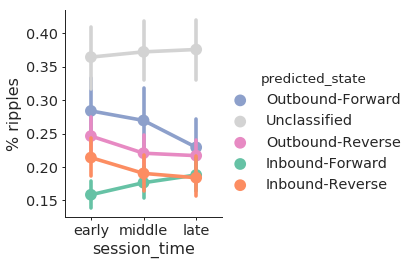

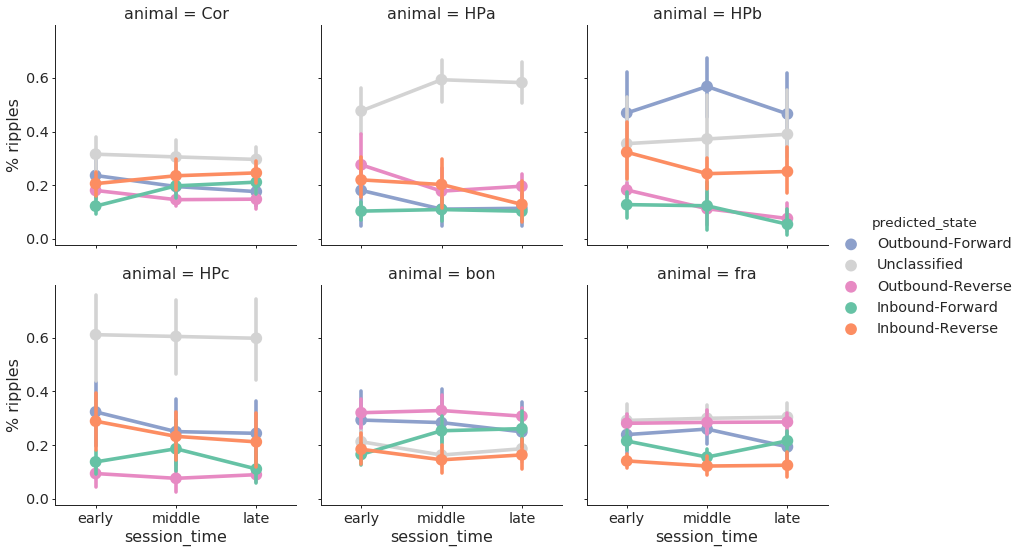

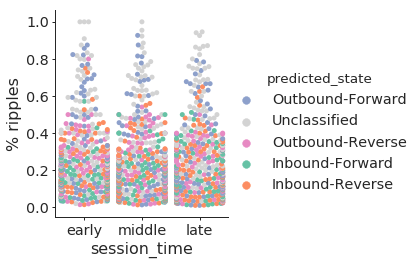

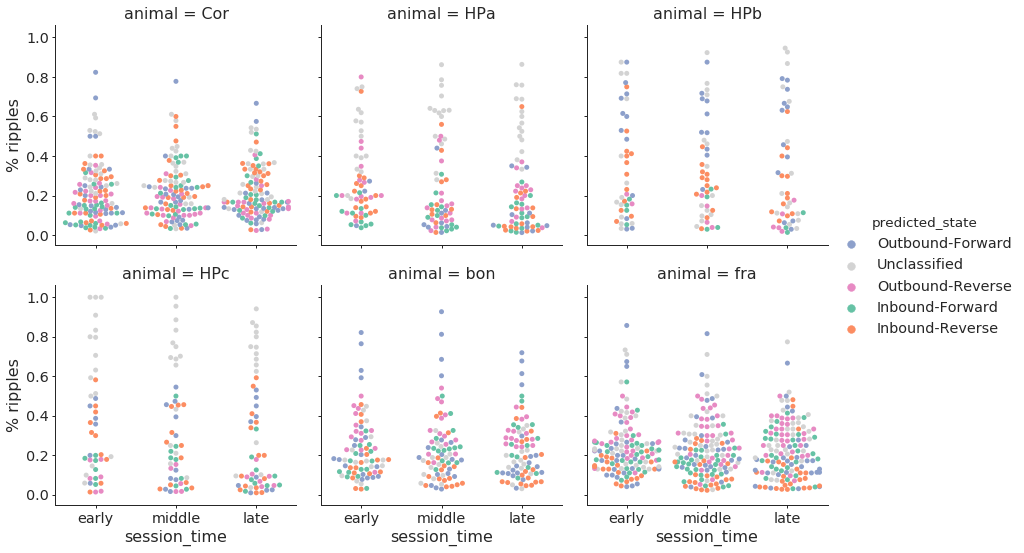

In [29]:
covariate = 'predicted_state'
replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('% ripples').reset_index())

sns.factorplot(data=replay_percentage, x='session_time', y='% ripples', hue=covariate, palette=COLORS);
sns.factorplot(data=replay_percentage, x='session_time', y='% ripples',
               hue=covariate, col='animal', col_wrap=3, palette=COLORS);
sns.factorplot(data=replay_percentage, x='session_time', y='% ripples',
               hue=covariate, kind='swarm', palette=COLORS);
sns.factorplot(data=replay_percentage, x='session_time', y='% ripples', hue=covariate,
               col='animal', col_wrap=3, kind='swarm', palette=COLORS);

## Position of Animal during Replay Types

In [30]:
position_occupancy = (
    xr.open_mfdataset(PROCESSED_DATA_DIR + '/*.nc', group='position_occupancy')
    .to_dataframe()
    .set_index(['animal', 'day', 'epoch']))

In [31]:
po = position_occupancy.groupby(['animal', 'environment', 'center_x', 'center_y']).sum()

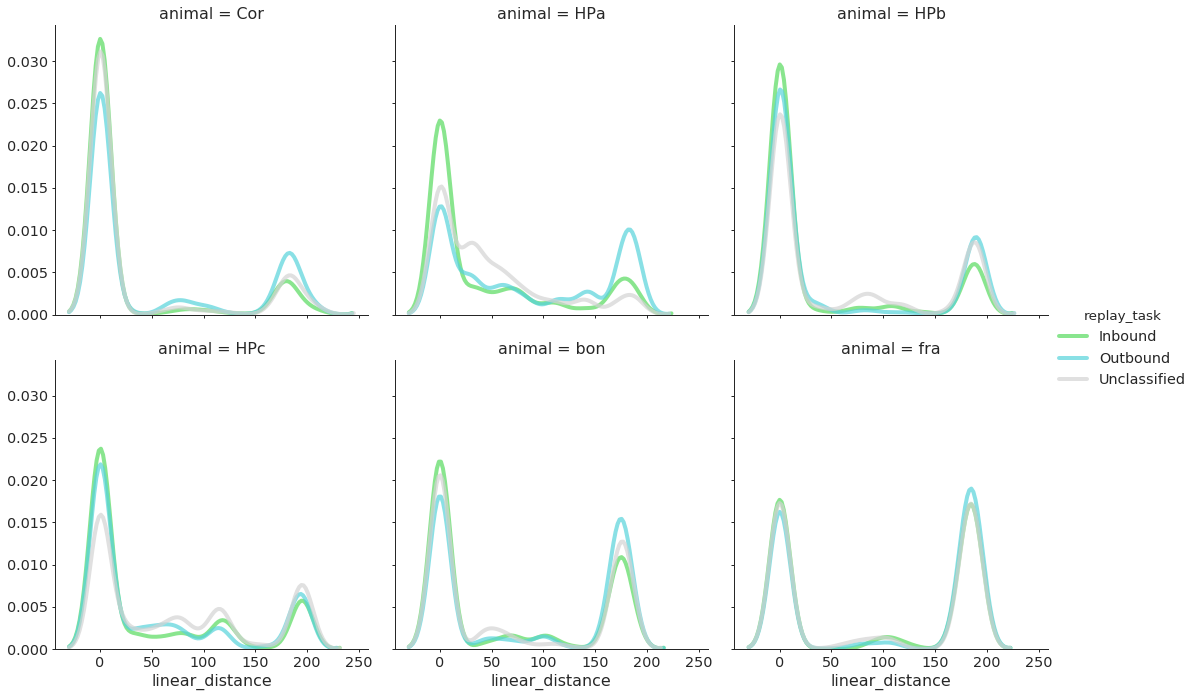

In [32]:
covariate = 'replay_task'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5, col_wrap=3, palette=COLORS)
g.map(sns.kdeplot, 'linear_distance', alpha=0.7, bw=10, linewidth=4);
g.add_legend();

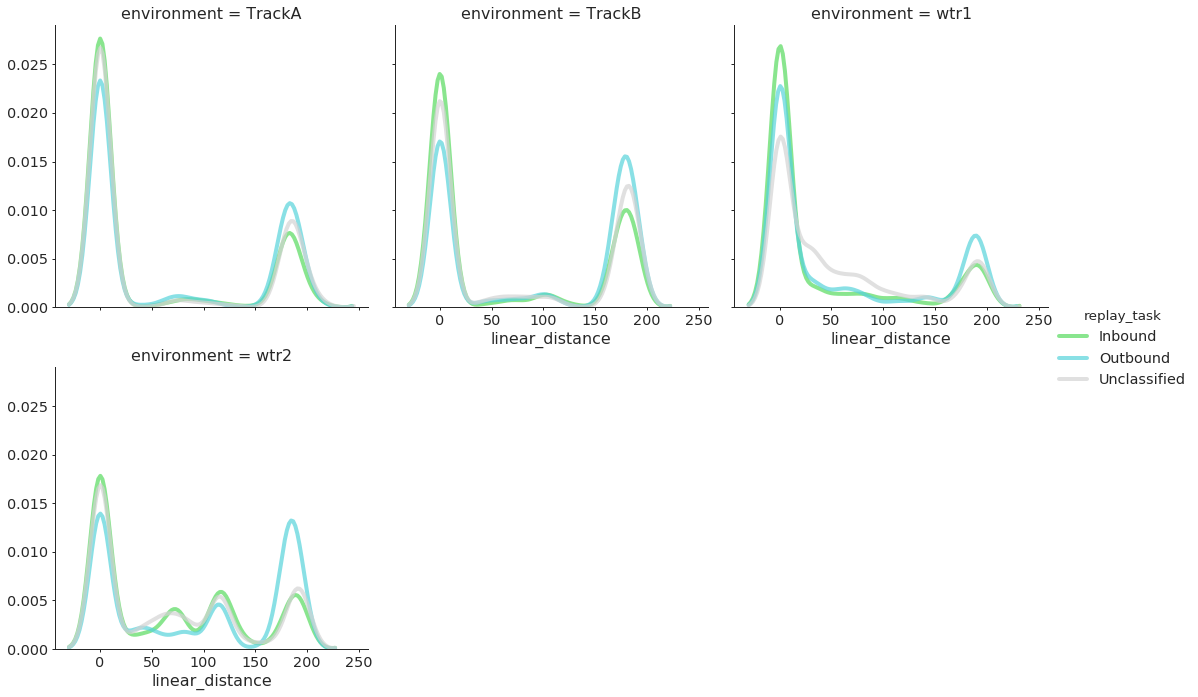

In [33]:
covariate = 'replay_task'
g = sns.FacetGrid(replay_info.reset_index(), col='environment', hue=covariate, size=5, col_wrap=3, palette=COLORS)
g.map(sns.kdeplot, 'linear_distance', alpha=0.7, bw=10, linewidth=4);
g.add_legend();

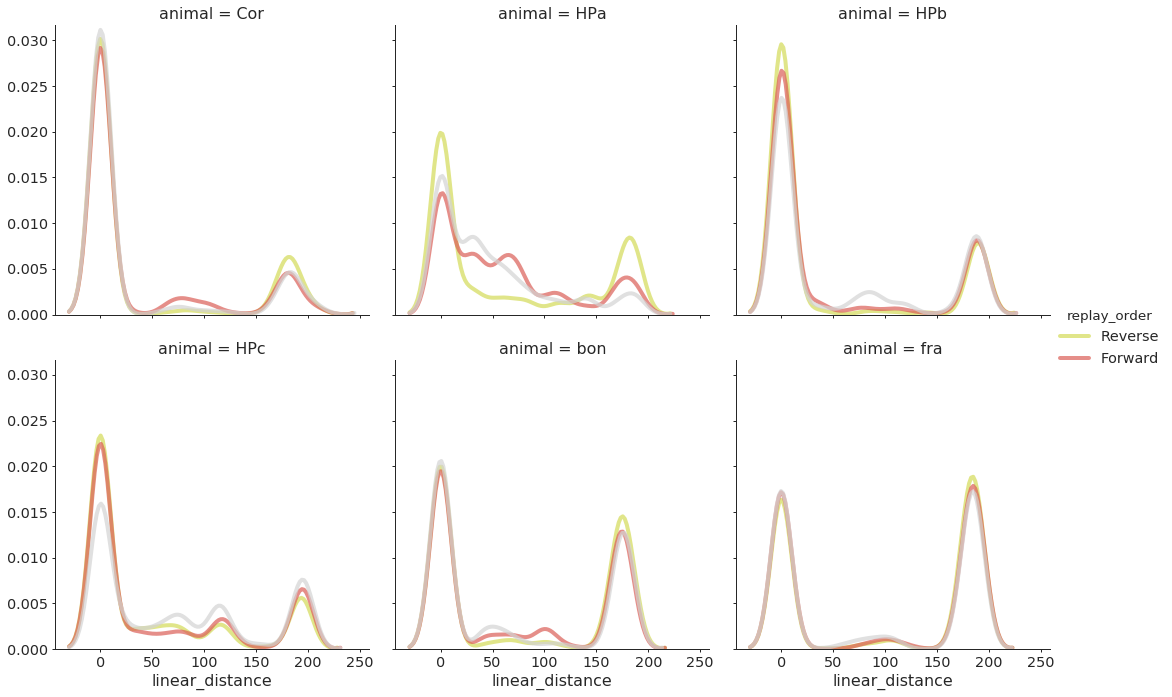

In [34]:
covariate = 'replay_order'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5, col_wrap=3, palette=COLORS)
g.map(sns.kdeplot, 'linear_distance', alpha=0.7, bw=10, linewidth=4);
g.add_legend();

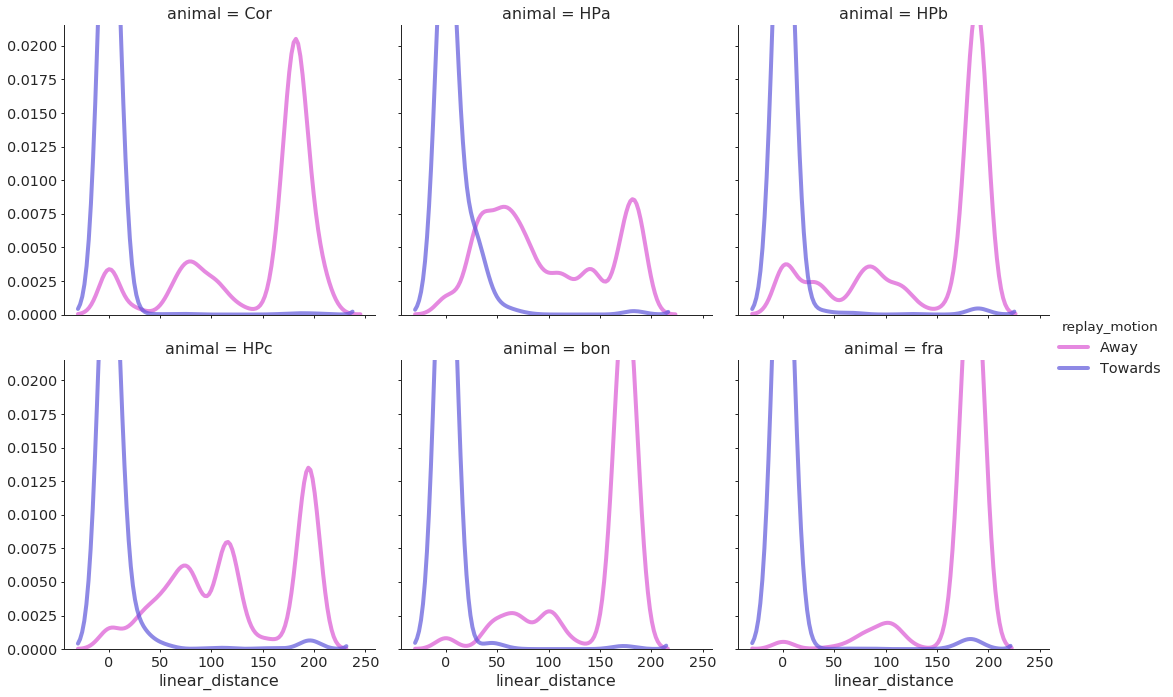

In [35]:
covariate = 'replay_motion'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5, col_wrap=3, palette=COLORS)
g.map(sns.kdeplot, 'linear_distance', alpha=0.7, bw=10, linewidth=4);
g.add_legend();

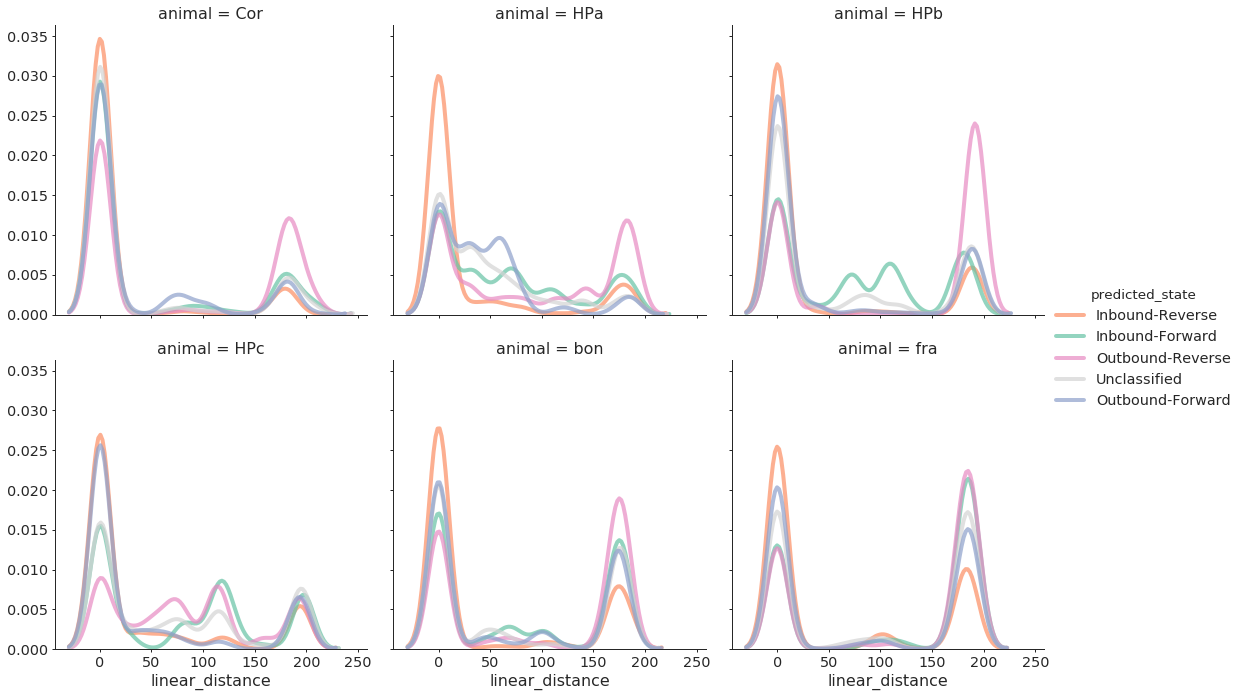

In [36]:
covariate = 'predicted_state'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5, col_wrap=3, palette=COLORS)
g.map(sns.kdeplot, 'linear_distance', alpha=0.7, bw=10, linewidth=4);
g.add_legend();

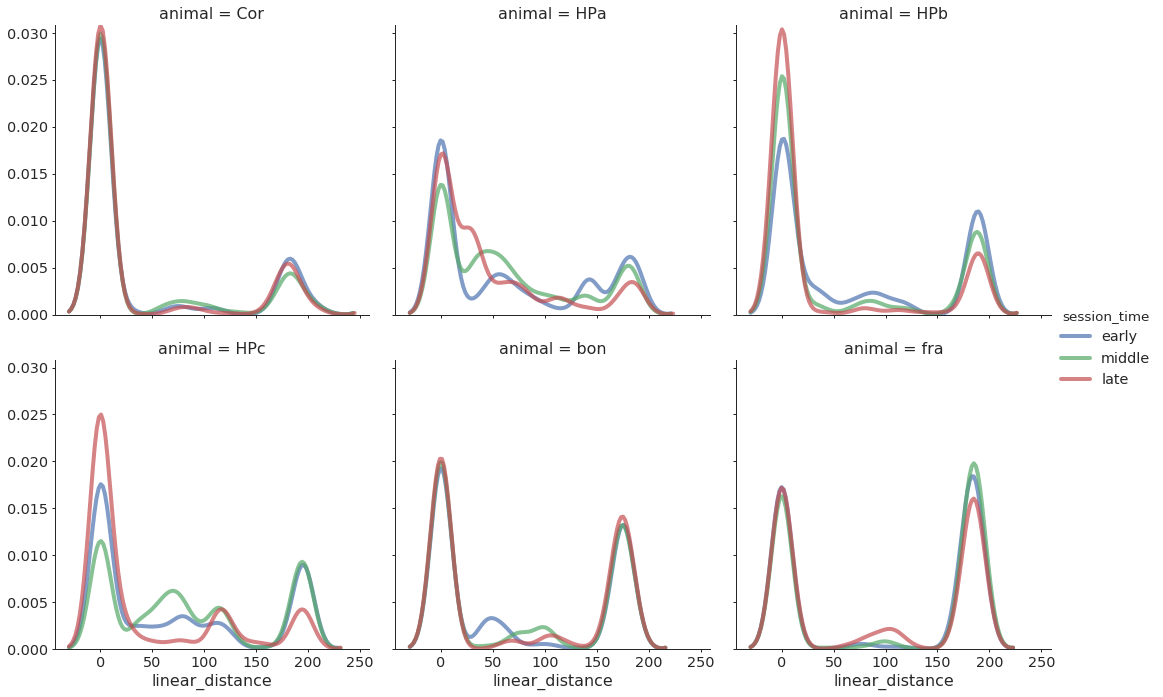

In [37]:
covariate = 'session_time'
g = sns.FacetGrid(replay_info.reset_index(), col='animal', hue=covariate, size=5, col_wrap=3)
g.map(sns.kdeplot, 'linear_distance', alpha=0.7, bw=10, linewidth=4);
g.add_legend();

### Occupancy Normalized 

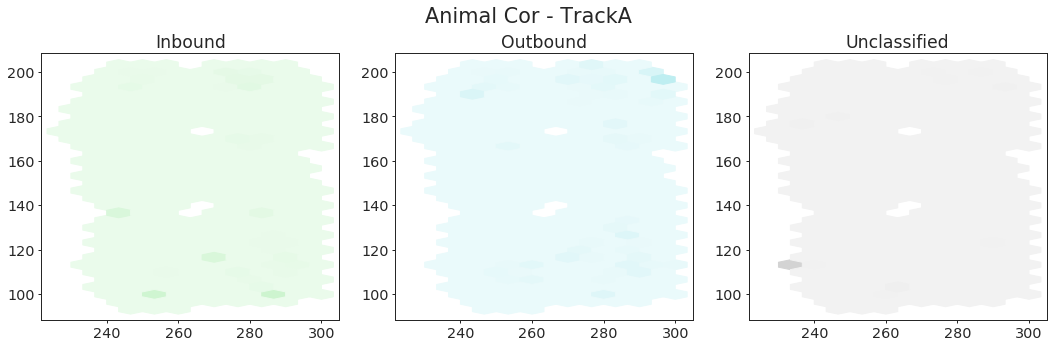

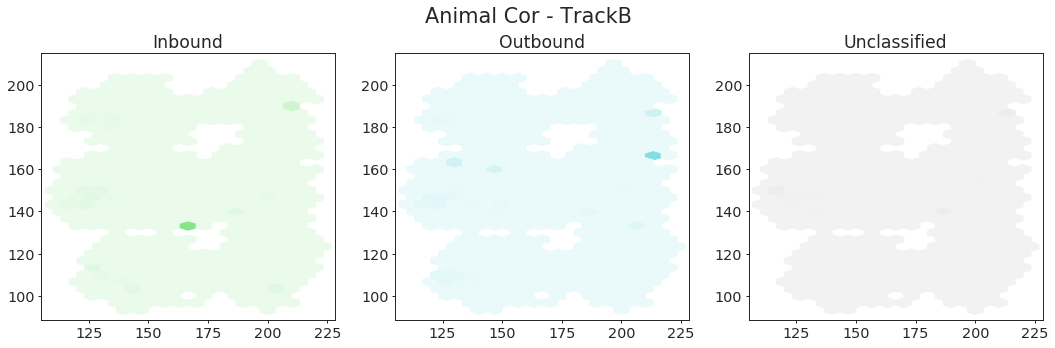

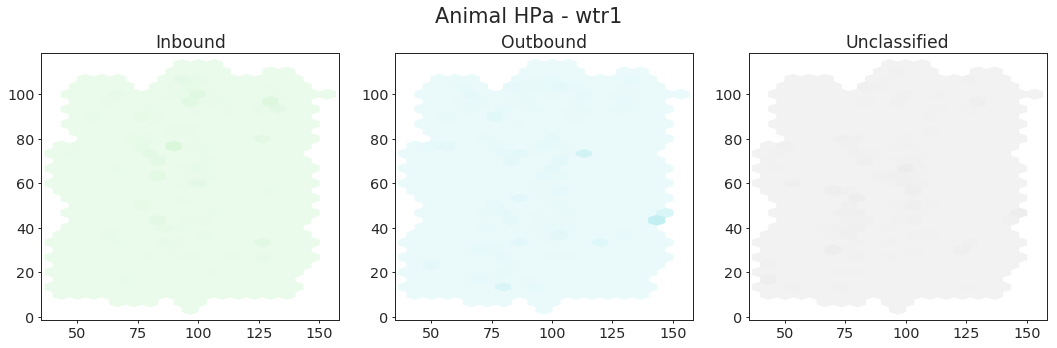

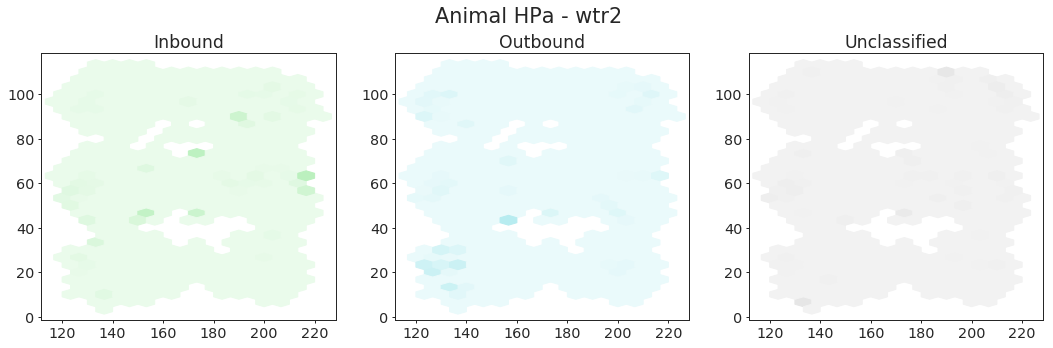

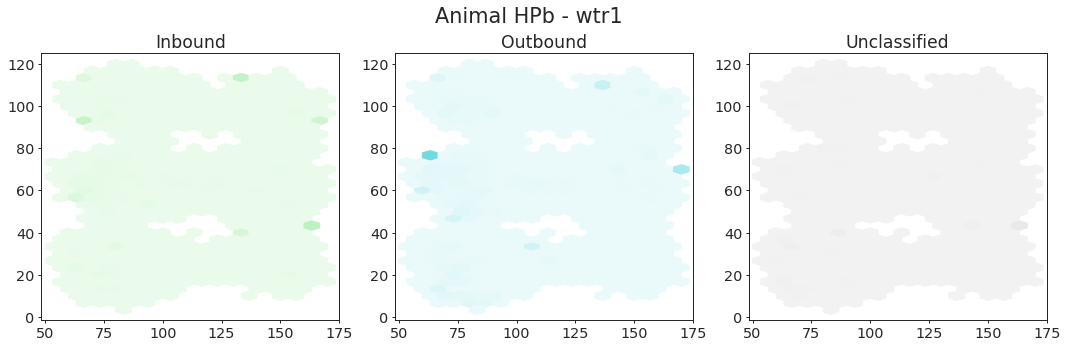

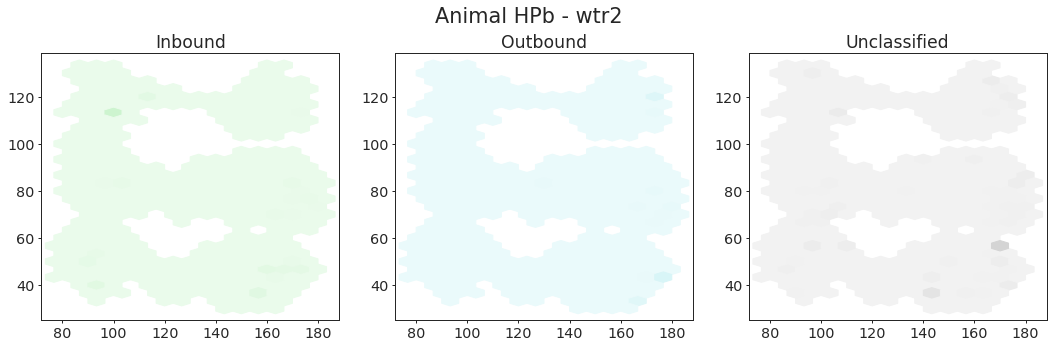

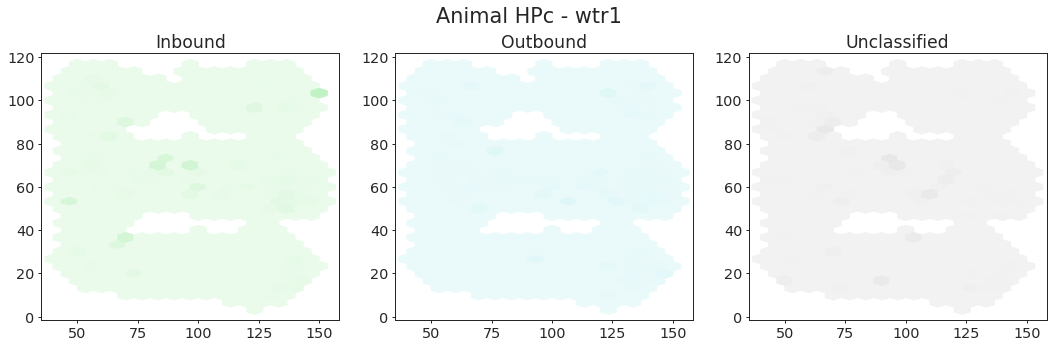

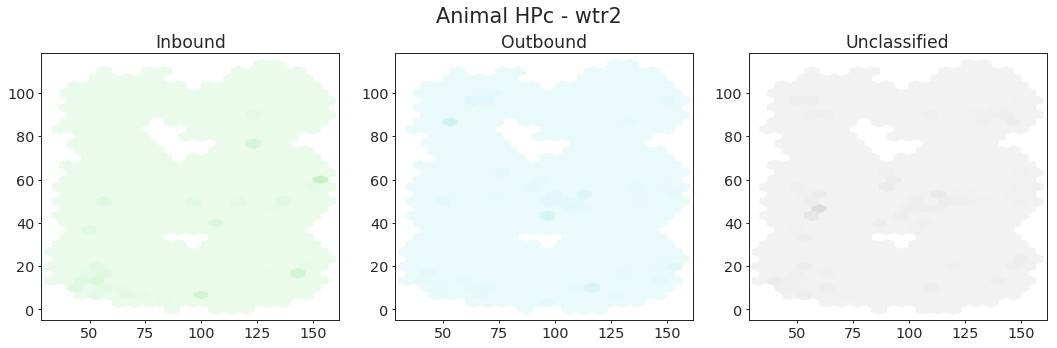

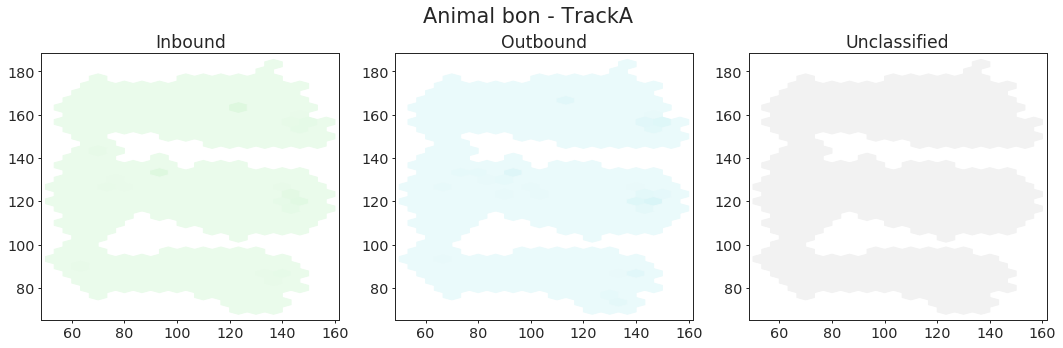

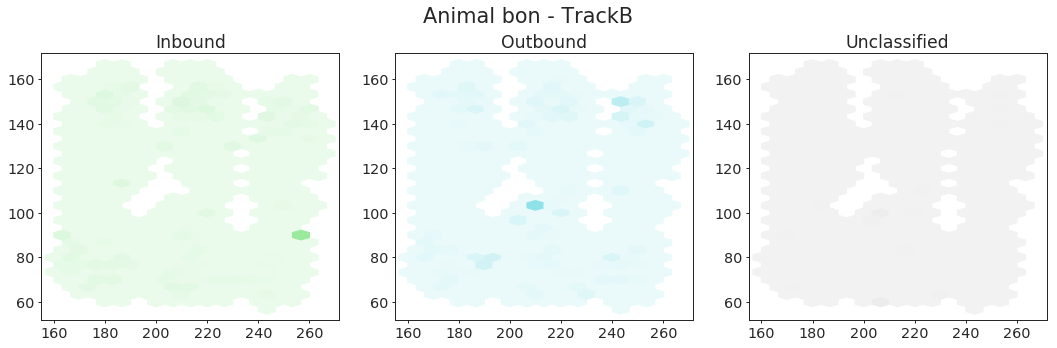

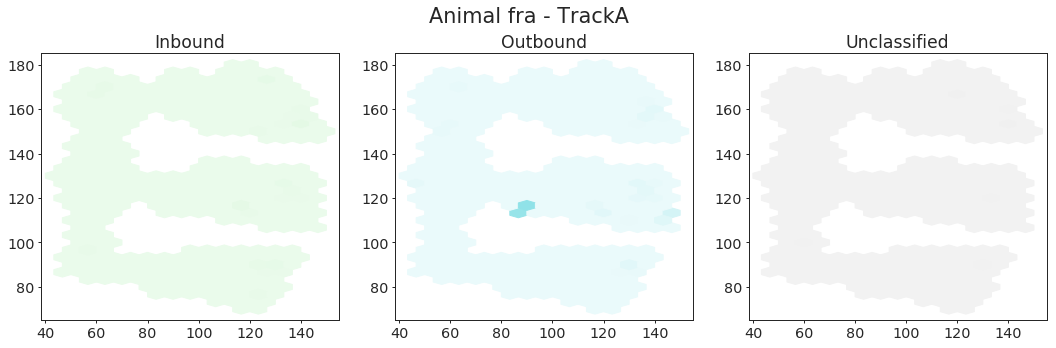

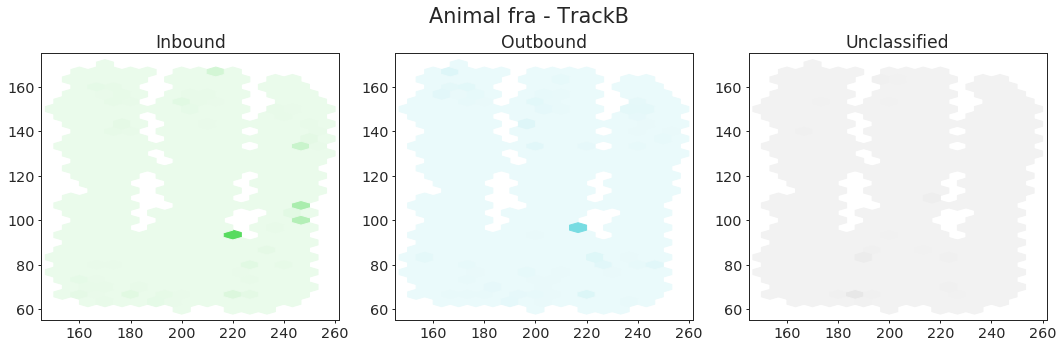

In [38]:
from src.parameters import GRIDSIZE, EXTENT, SAMPLING_FREQUENCY

covariate = 'replay_task'
for name, group in replay_info.groupby(['animal', 'environment']):
    grouped = group.groupby(covariate)
    n_levels = len(grouped)
    fig, axes = plt.subplots(1, n_levels, figsize=(5 * n_levels, 5), sharex=True, sharey=True)
    occupancy = po.xs(name[:2]).reset_index().set_index(['center_x', 'center_y']).sort_index()
    for ax, (level, level_group) in zip(axes, grouped):
        event_count = ax.hexbin(level_group.x_position, level_group.y_position,
                                gridsize=GRIDSIZE, extent=EXTENT);
        ax.cla()
        event_count = pd.DataFrame(
                {'event_count': event_count.get_array(),
                 'center_x': event_count.get_offsets()[:, 0],
                 'center_y': event_count.get_offsets()[:, 1]}).set_index(['center_x', 'center_y']).sort_index()
        normalized_count = pd.concat((event_count, occupancy), axis=1).reset_index()
        normalized_count['normalized_count'] = (
            SAMPLING_FREQUENCY * normalized_count.event_count / normalized_count.occupancy_count)
        mappable = ax.hexbin(normalized_count.center_x, normalized_count.center_y,
                             C=normalized_count.normalized_count, gridsize=GRIDSIZE, extent=EXTENT,
                             cmap=sns.light_palette(COLORS[level], as_cmap=True), vmin=0, vmax=2)
#         ax.scatter(level_group.x_position, level_group.y_position, color='red', s=2)
        ax.set_title(level)
        xlim = np.percentile(
            normalized_count.center_x[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ylim = np.percentile(
            normalized_count.center_y[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ax.set_xlim(xlim + [-5, 5])
        ax.set_ylim(ylim + [-5, 5])
    fig.suptitle('Animal {0} - {1}'.format(*name))
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

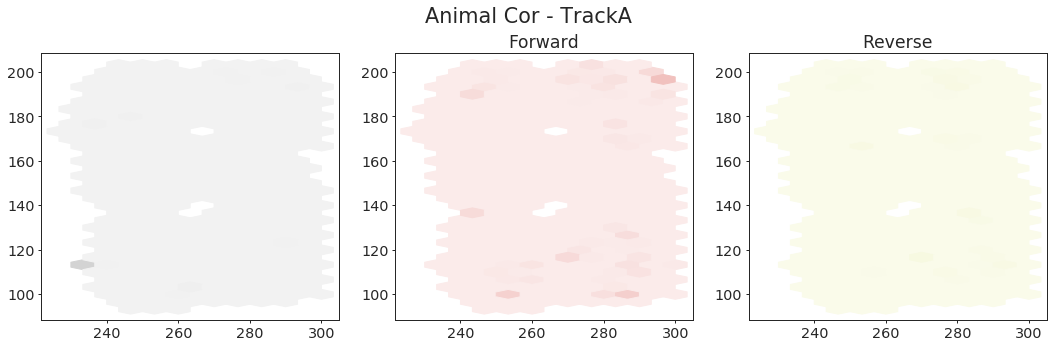

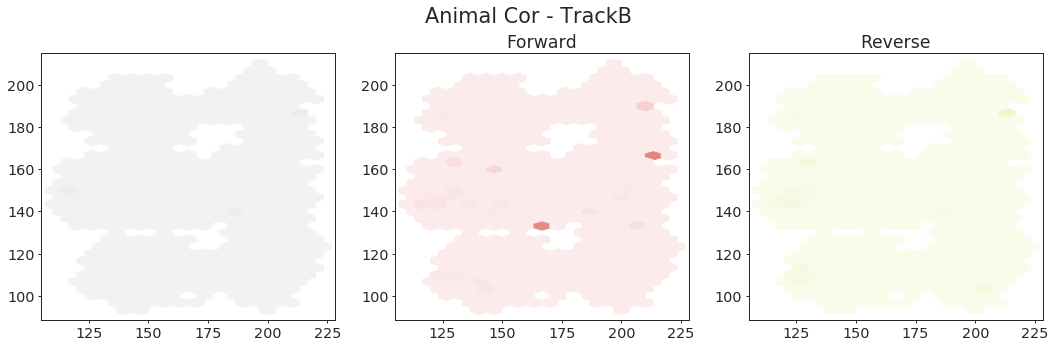

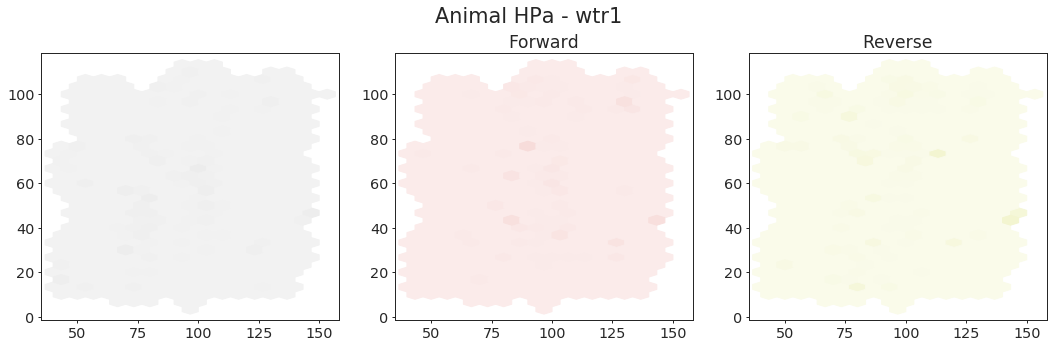

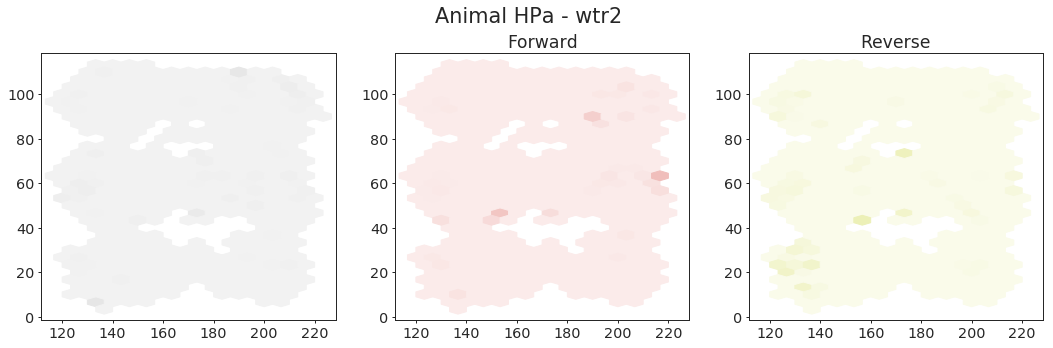

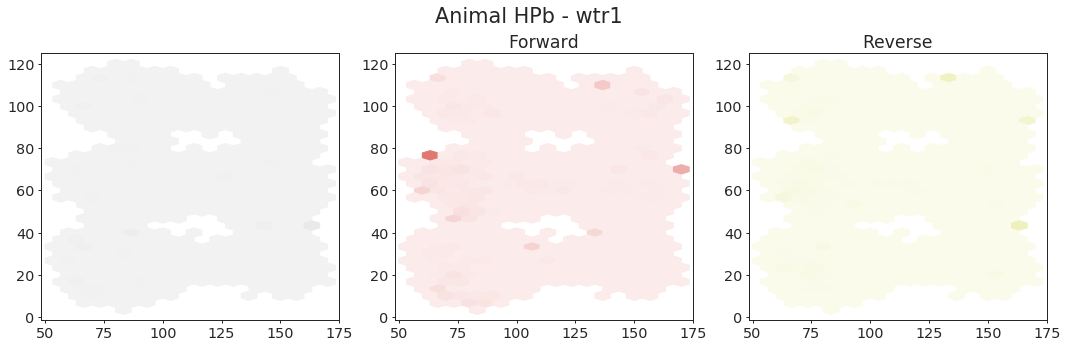

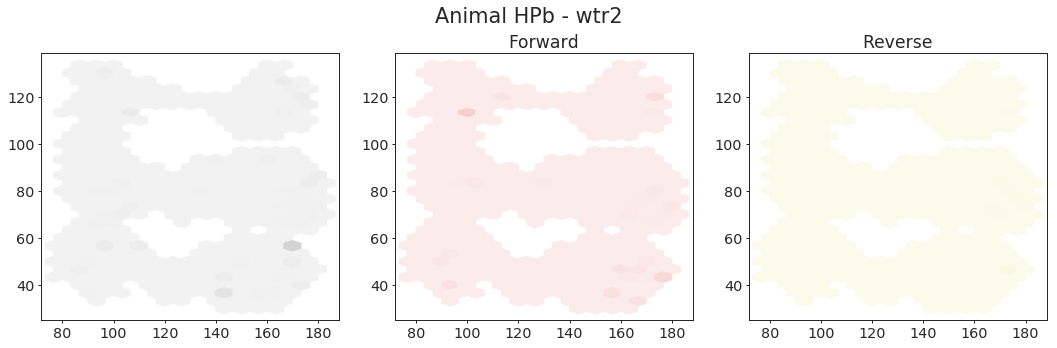

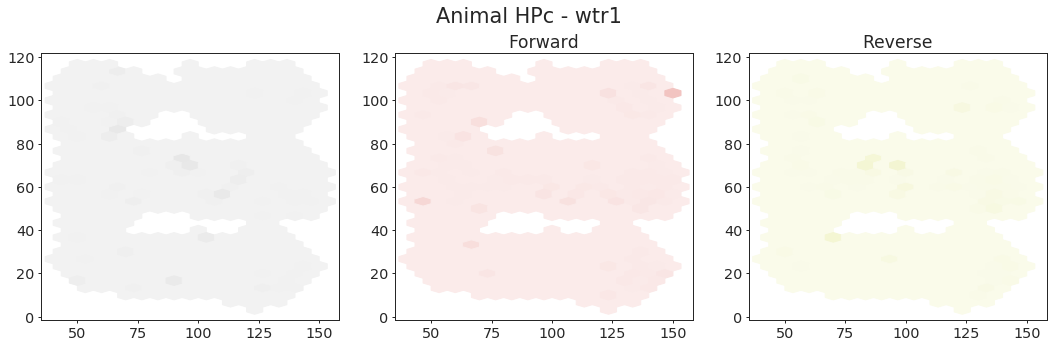

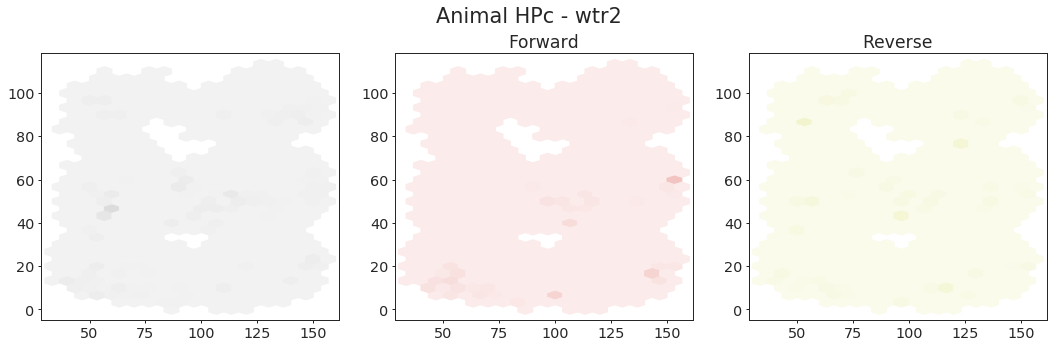

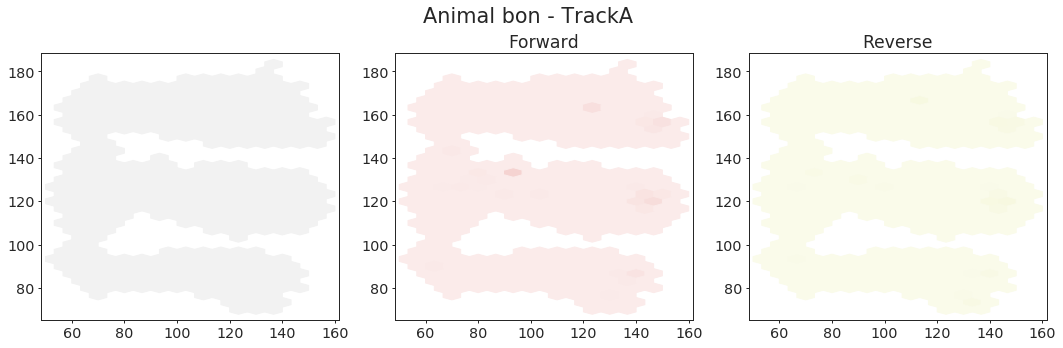

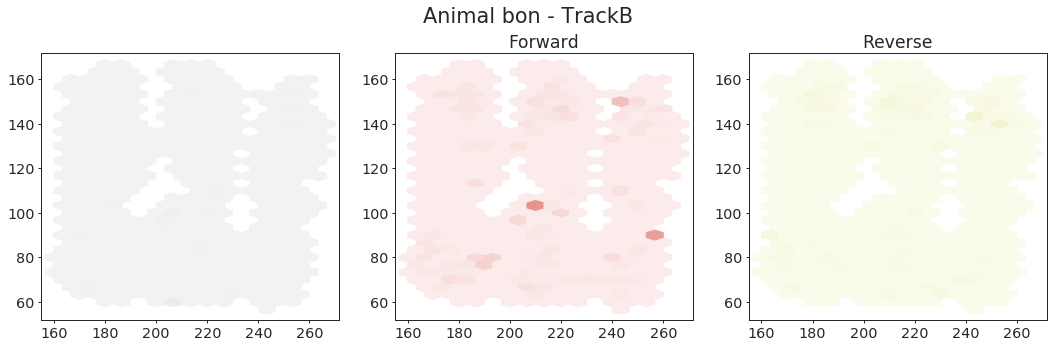

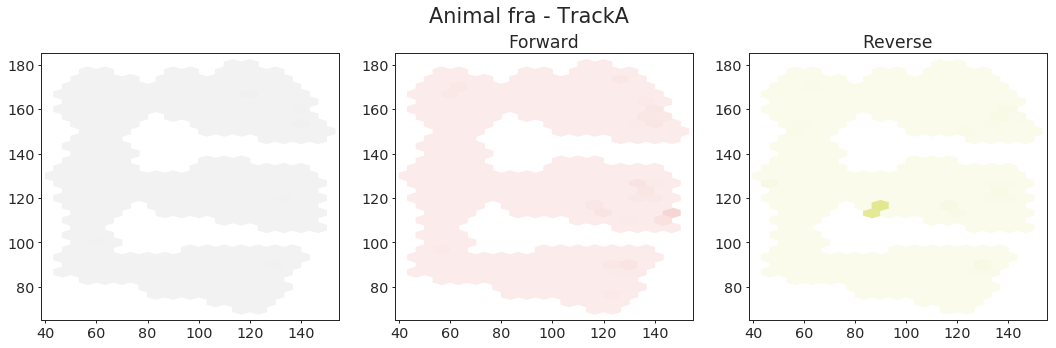

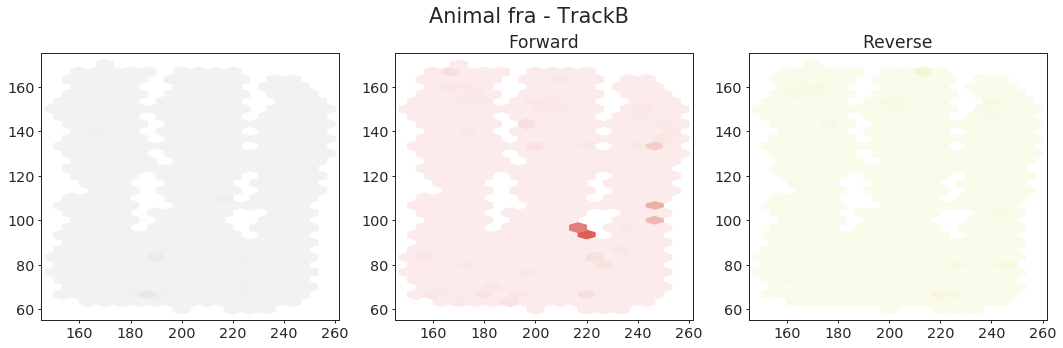

In [39]:
from src.parameters import GRIDSIZE, EXTENT, SAMPLING_FREQUENCY

covariate = 'replay_order'
for name, group in replay_info.groupby(['animal', 'environment']):
    grouped = group.groupby(covariate)
    n_levels = len(grouped)
    fig, axes = plt.subplots(1, n_levels, figsize=(5 * n_levels, 5), sharex=True, sharey=True)
    occupancy = po.xs(name[:2]).reset_index().set_index(['center_x', 'center_y']).sort_index()
    for ax, (level, level_group) in zip(axes, grouped):
        event_count = ax.hexbin(level_group.x_position, level_group.y_position,
                                gridsize=GRIDSIZE, extent=EXTENT);
        ax.cla()
        event_count = pd.DataFrame(
                {'event_count': event_count.get_array(),
                 'center_x': event_count.get_offsets()[:, 0],
                 'center_y': event_count.get_offsets()[:, 1]}).set_index(['center_x', 'center_y']).sort_index()
        normalized_count = pd.concat((event_count, occupancy), axis=1).reset_index()
        normalized_count['normalized_count'] = (
            SAMPLING_FREQUENCY * normalized_count.event_count / normalized_count.occupancy_count)
        mappable = ax.hexbin(normalized_count.center_x, normalized_count.center_y,
                             C=normalized_count.normalized_count, gridsize=GRIDSIZE, extent=EXTENT,
                             cmap=sns.light_palette(COLORS[level], as_cmap=True), vmin=0, vmax=2)
#         ax.scatter(level_group.x_position, level_group.y_position, color='red', s=2)
        ax.set_title(level)
        xlim = np.percentile(
            normalized_count.center_x[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ylim = np.percentile(
            normalized_count.center_y[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ax.set_xlim(xlim + [-5, 5])
        ax.set_ylim(ylim + [-5, 5])
    fig.suptitle('Animal {0} - {1}'.format(*name))
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

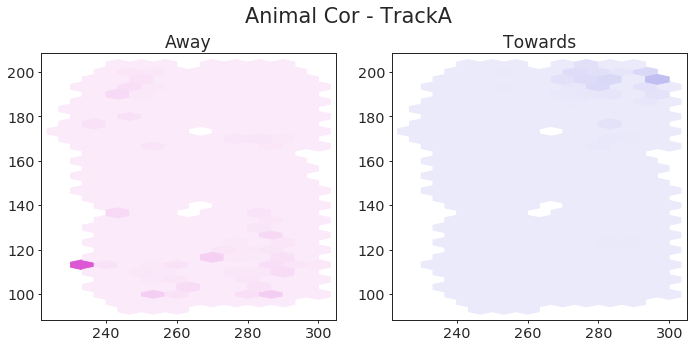

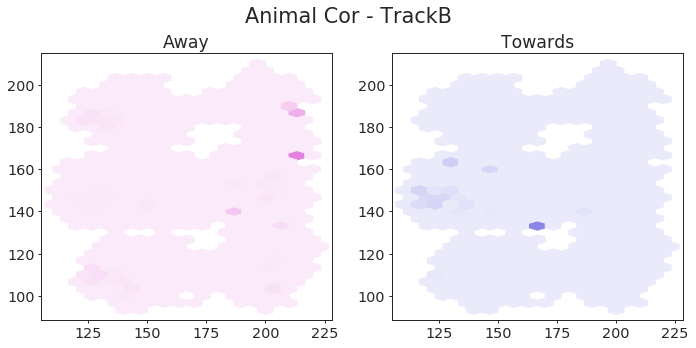

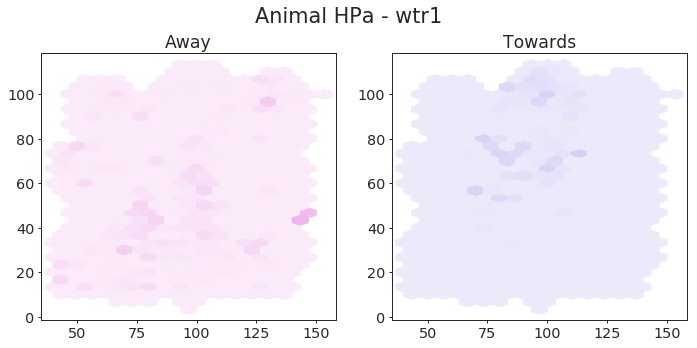

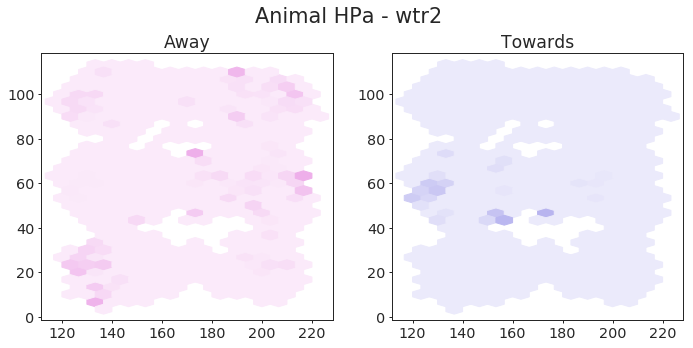

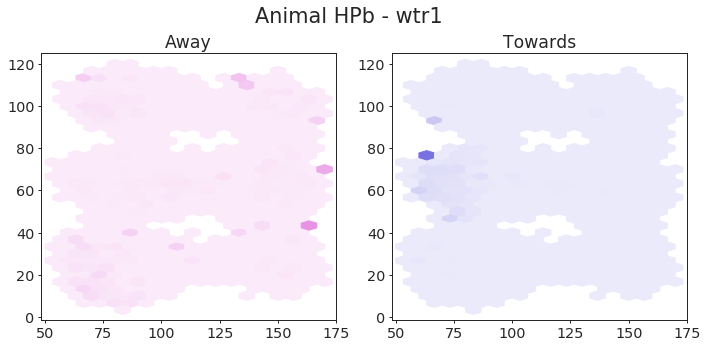

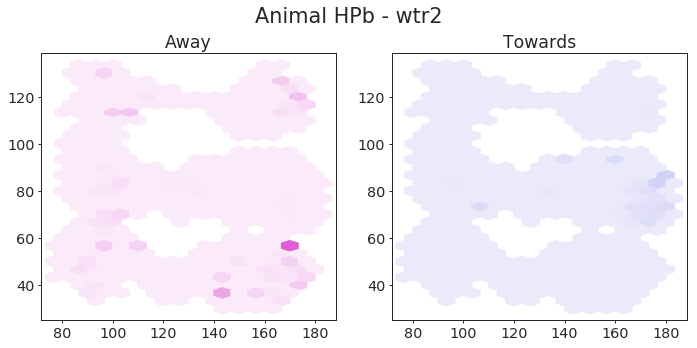

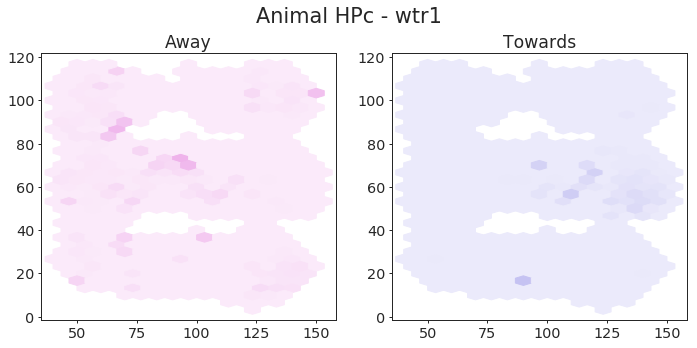

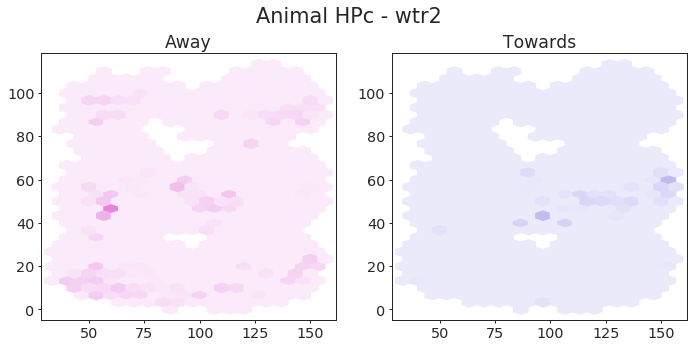

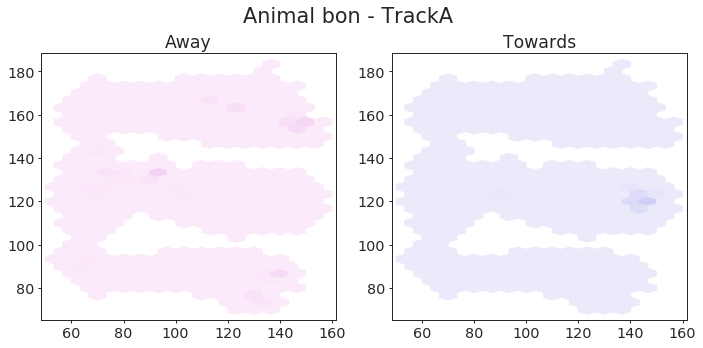

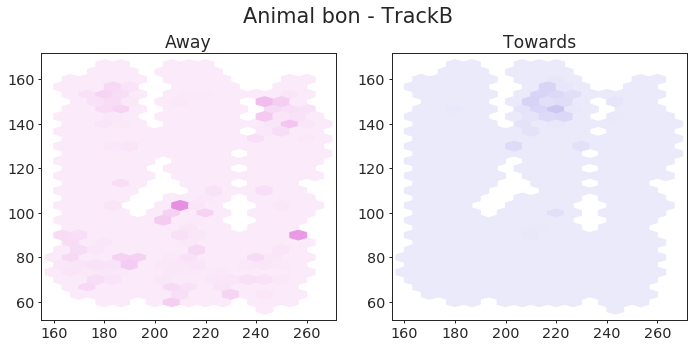

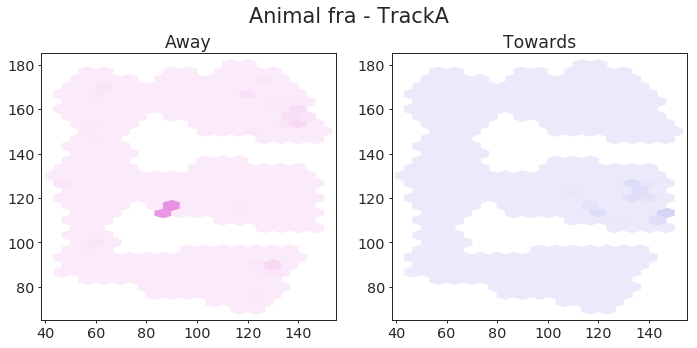

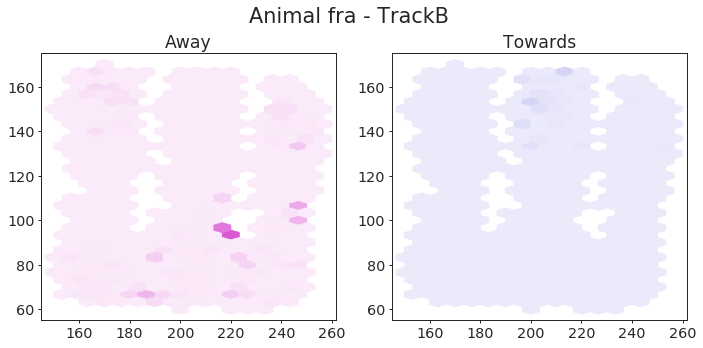

In [40]:
from src.parameters import GRIDSIZE, EXTENT, SAMPLING_FREQUENCY

covariate = 'replay_motion'
for name, group in replay_info.groupby(['animal', 'environment']):
    grouped = group.groupby(covariate)
    n_levels = len(grouped)
    fig, axes = plt.subplots(1, n_levels, figsize=(5 * n_levels, 5), sharex=True, sharey=True)
    occupancy = po.xs(name[:2]).reset_index().set_index(['center_x', 'center_y']).sort_index()
    for ax, (level, level_group) in zip(axes, grouped):
        event_count = ax.hexbin(level_group.x_position, level_group.y_position,
                                gridsize=GRIDSIZE, extent=EXTENT);
        ax.cla()
        event_count = pd.DataFrame(
                {'event_count': event_count.get_array(),
                 'center_x': event_count.get_offsets()[:, 0],
                 'center_y': event_count.get_offsets()[:, 1]}).set_index(['center_x', 'center_y']).sort_index()
        normalized_count = pd.concat((event_count, occupancy), axis=1).reset_index()
        normalized_count['normalized_count'] = (
            SAMPLING_FREQUENCY * normalized_count.event_count / normalized_count.occupancy_count)
        mappable = ax.hexbin(normalized_count.center_x, normalized_count.center_y,
                             C=normalized_count.normalized_count, gridsize=GRIDSIZE, extent=EXTENT,
                             cmap=sns.light_palette(COLORS[level], as_cmap=True), vmin=0, vmax=2)
#         ax.scatter(level_group.x_position, level_group.y_position, color='red', s=2)
        ax.set_title(level)
        xlim = np.percentile(
            normalized_count.center_x[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ylim = np.percentile(
            normalized_count.center_y[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ax.set_xlim(xlim + [-5, 5])
        ax.set_ylim(ylim + [-5, 5])
    fig.suptitle('Animal {0} - {1}'.format(*name))
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

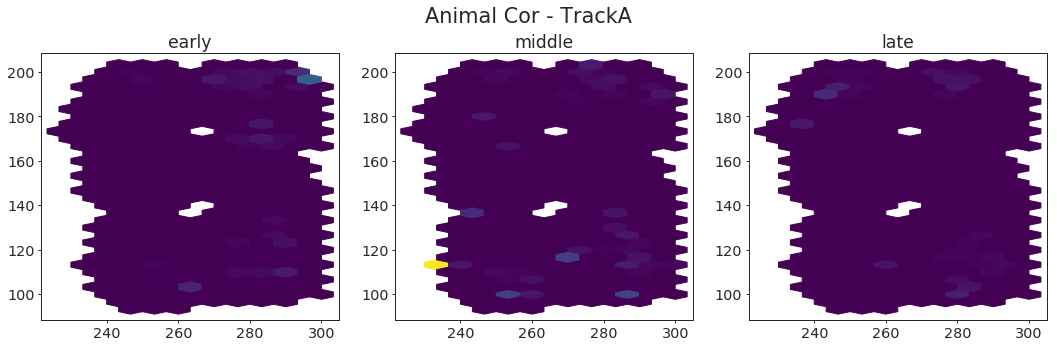

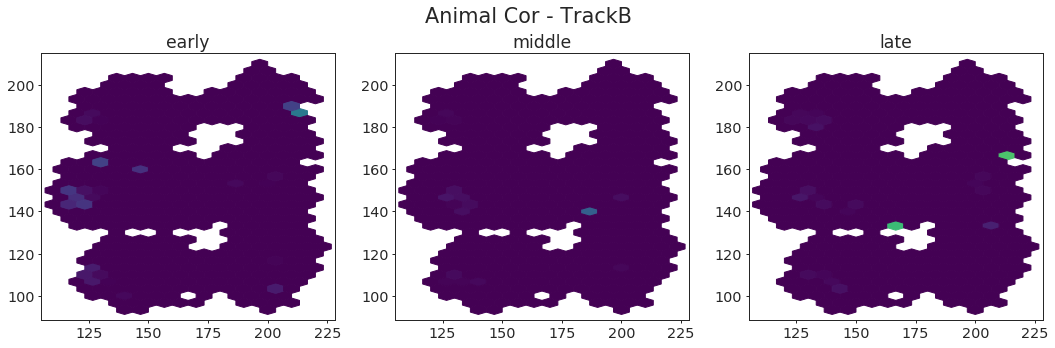

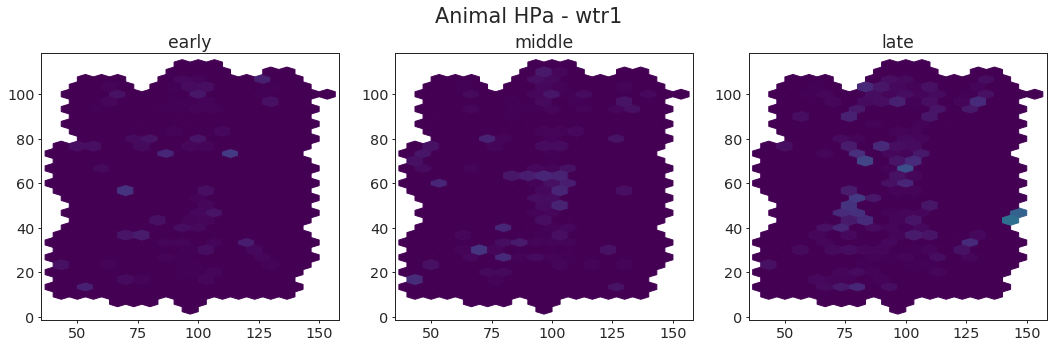

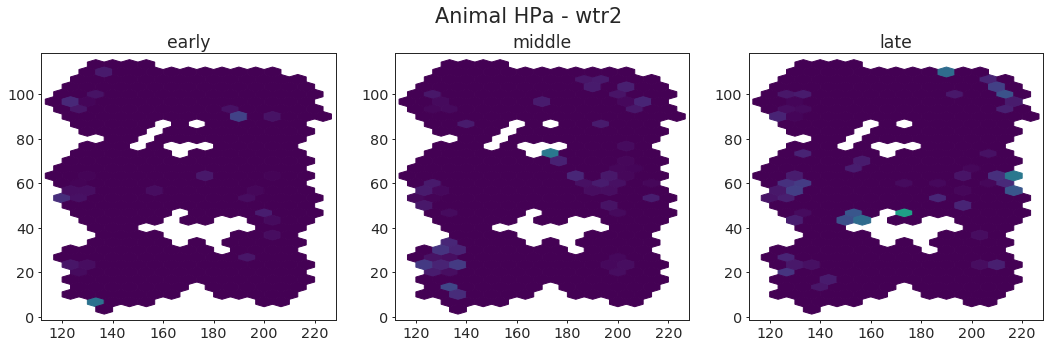

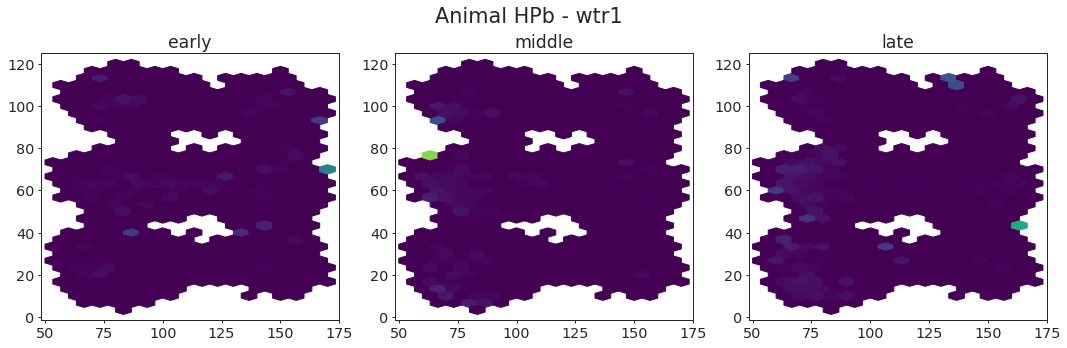

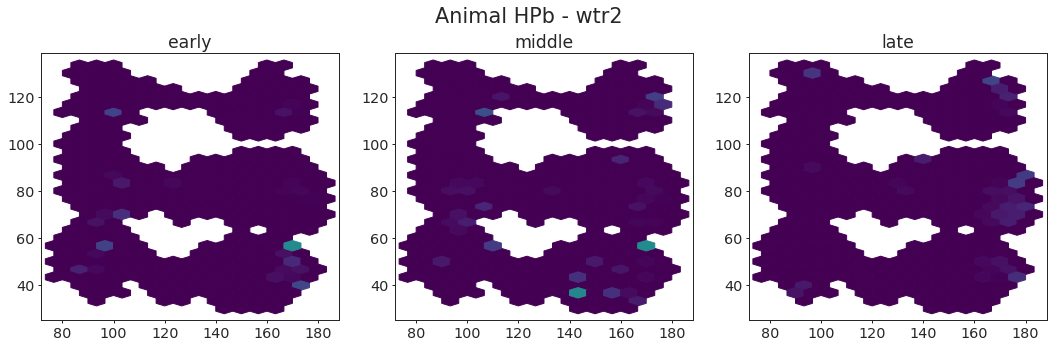

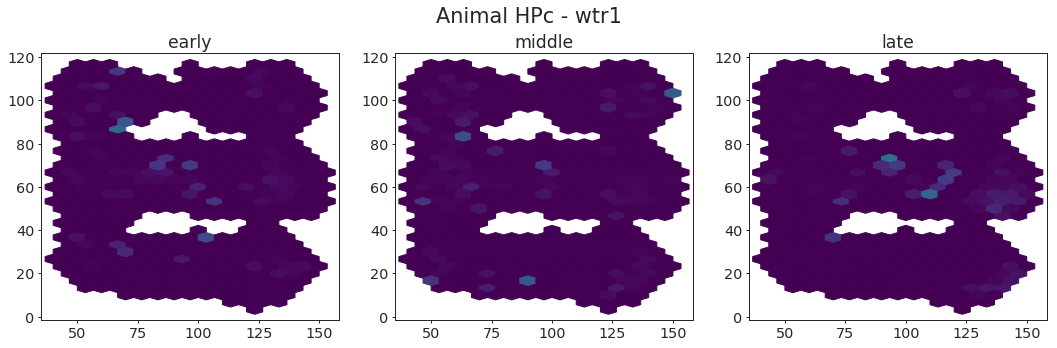

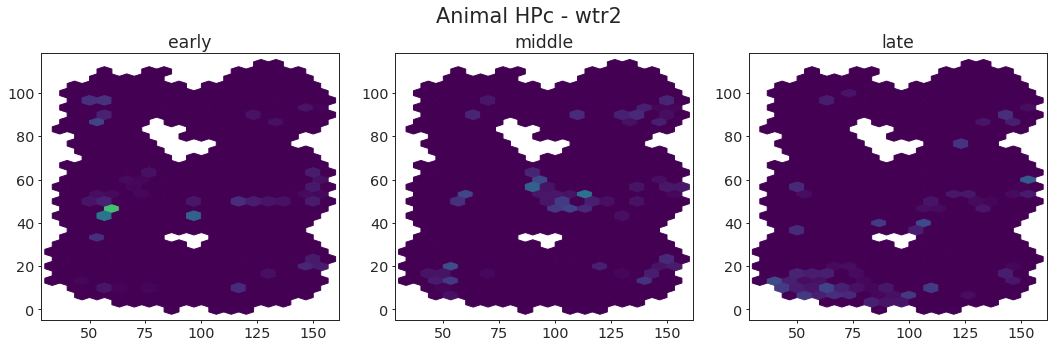

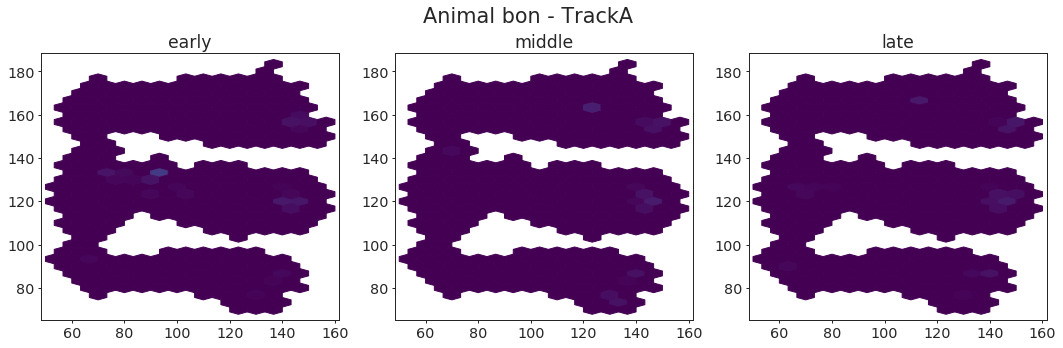

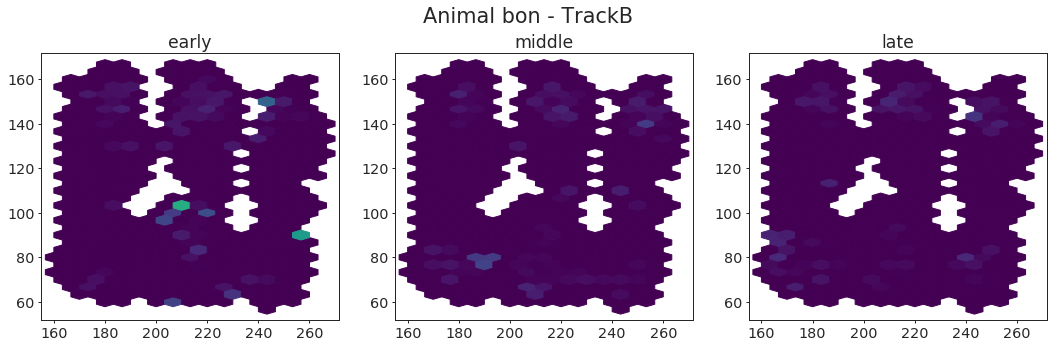

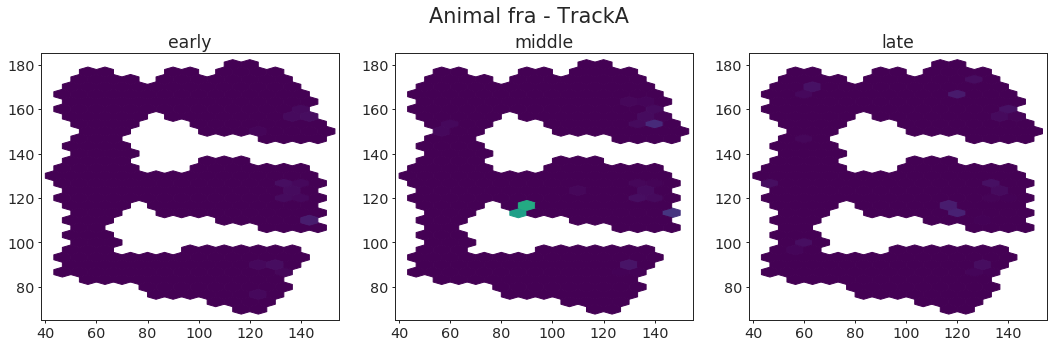

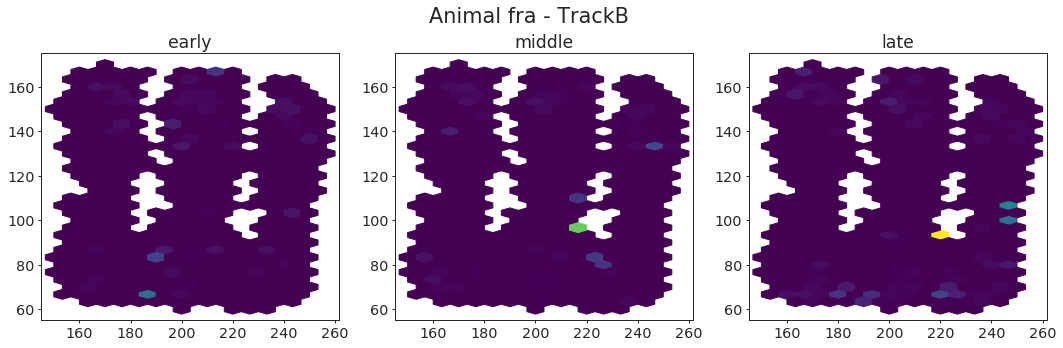

In [41]:
from src.parameters import GRIDSIZE, EXTENT, SAMPLING_FREQUENCY

covariate = 'session_time'
for name, group in replay_info.groupby(['animal', 'environment']):
    grouped = group.groupby(covariate)
    n_levels = len(grouped)
    fig, axes = plt.subplots(1, n_levels, figsize=(5 * n_levels, 5), sharex=True, sharey=True)
    occupancy = po.xs(name[:2]).reset_index().set_index(['center_x', 'center_y']).sort_index()
    for ax, (level, level_group) in zip(axes, grouped):
        event_count = ax.hexbin(level_group.x_position, level_group.y_position,
                                gridsize=GRIDSIZE, extent=EXTENT);
        ax.cla()
        event_count = pd.DataFrame(
                {'event_count': event_count.get_array(),
                 'center_x': event_count.get_offsets()[:, 0],
                 'center_y': event_count.get_offsets()[:, 1]}).set_index(['center_x', 'center_y']).sort_index()
        normalized_count = pd.concat((event_count, occupancy), axis=1).reset_index()
        normalized_count['normalized_count'] = (
            SAMPLING_FREQUENCY * normalized_count.event_count / normalized_count.occupancy_count)
        mappable = ax.hexbin(normalized_count.center_x, normalized_count.center_y,
                             C=normalized_count.normalized_count, gridsize=GRIDSIZE, extent=EXTENT,
                             cmap='viridis', vmin=0, vmax=2)
#         ax.scatter(level_group.x_position, level_group.y_position, color='red', s=2)
        ax.set_title(level)
        xlim = np.percentile(
            normalized_count.center_x[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ylim = np.percentile(
            normalized_count.center_y[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ax.set_xlim(xlim + [-5, 5])
        ax.set_ylim(ylim + [-5, 5])
    fig.suptitle('Animal {0} - {1}'.format(*name))
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

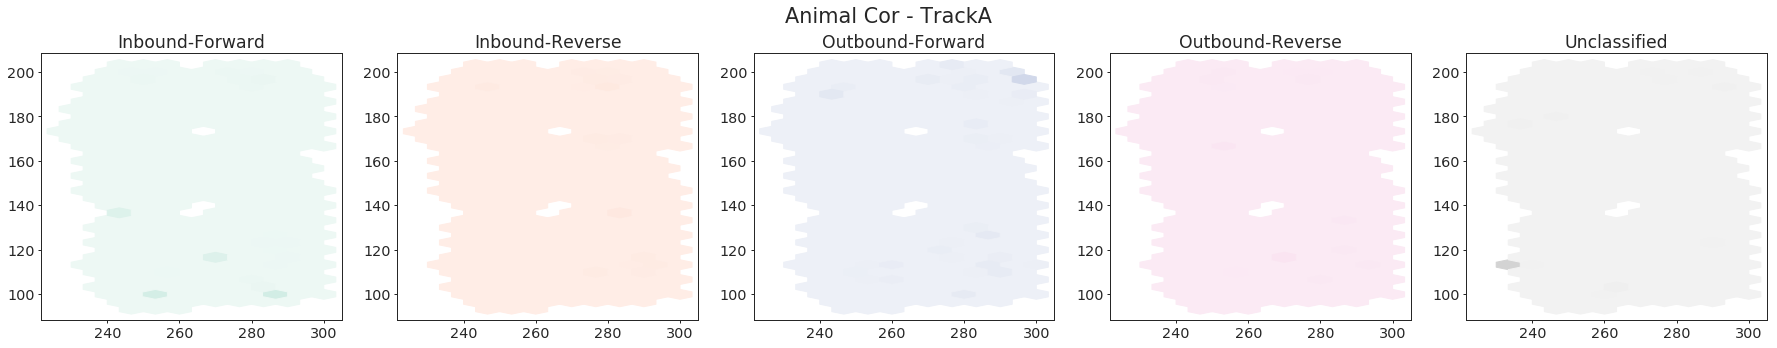

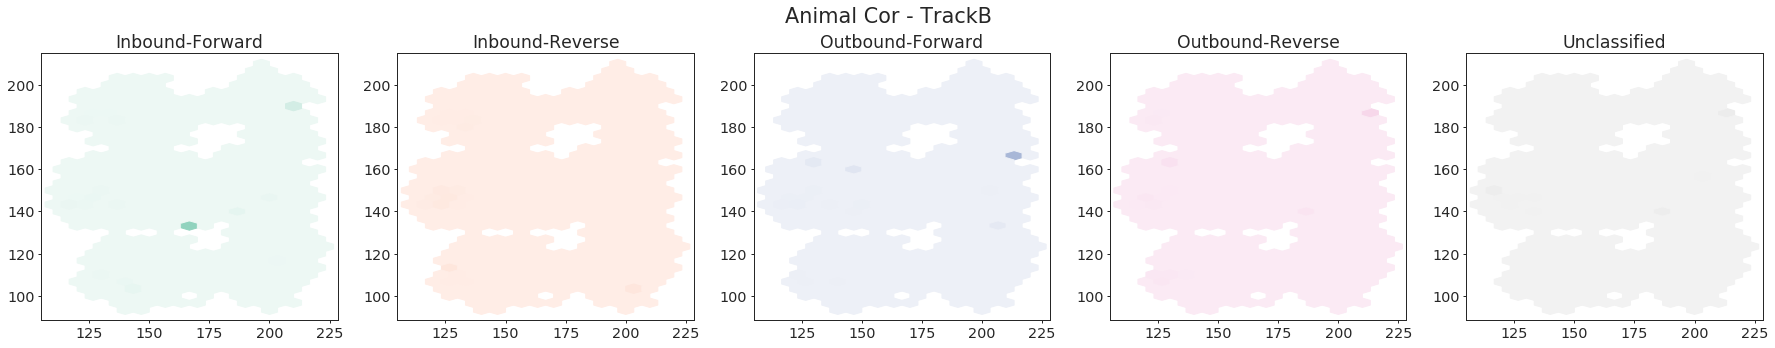

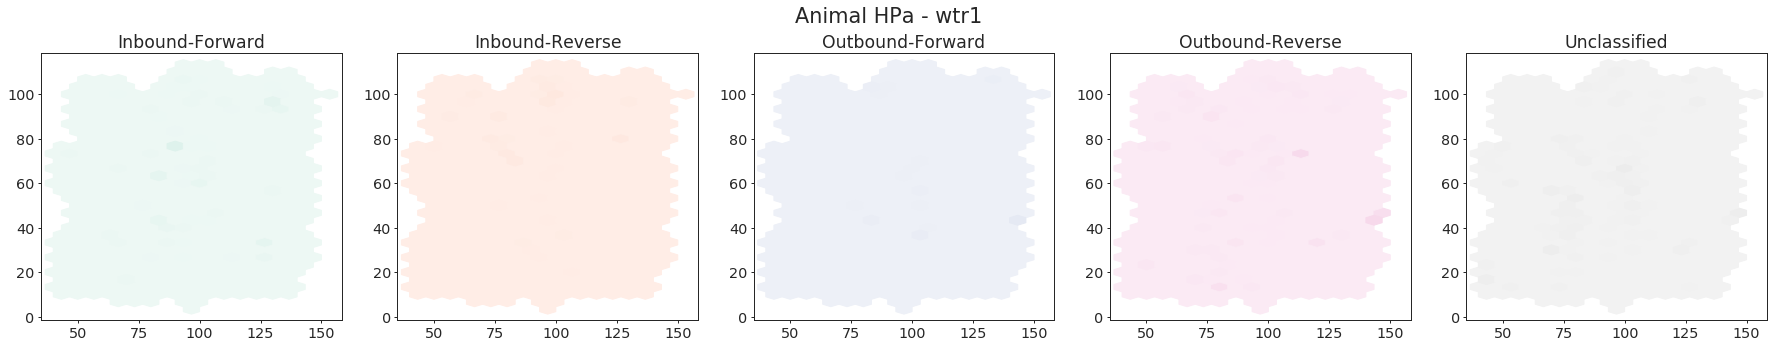

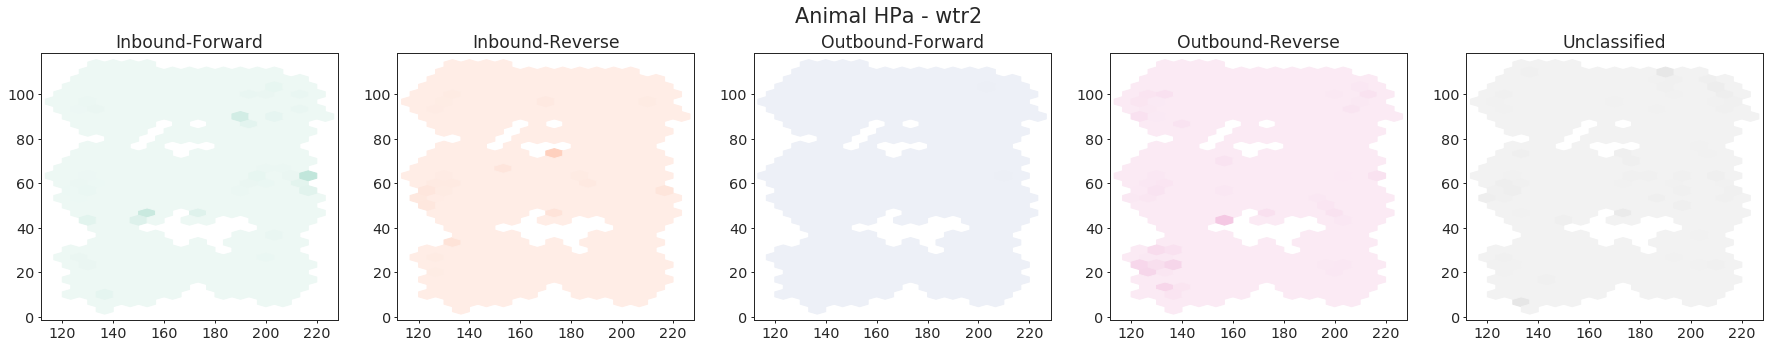

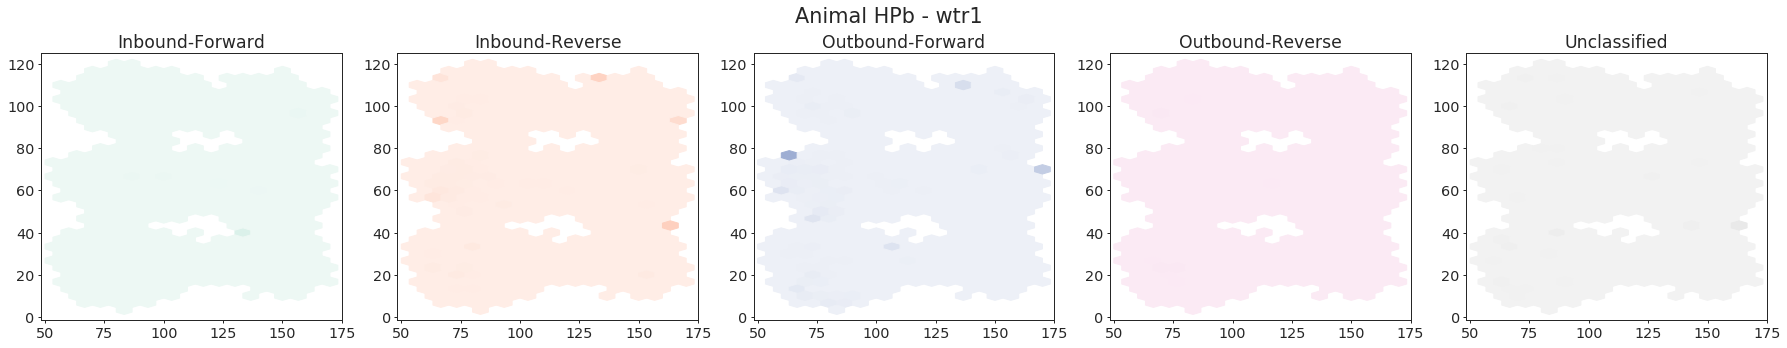

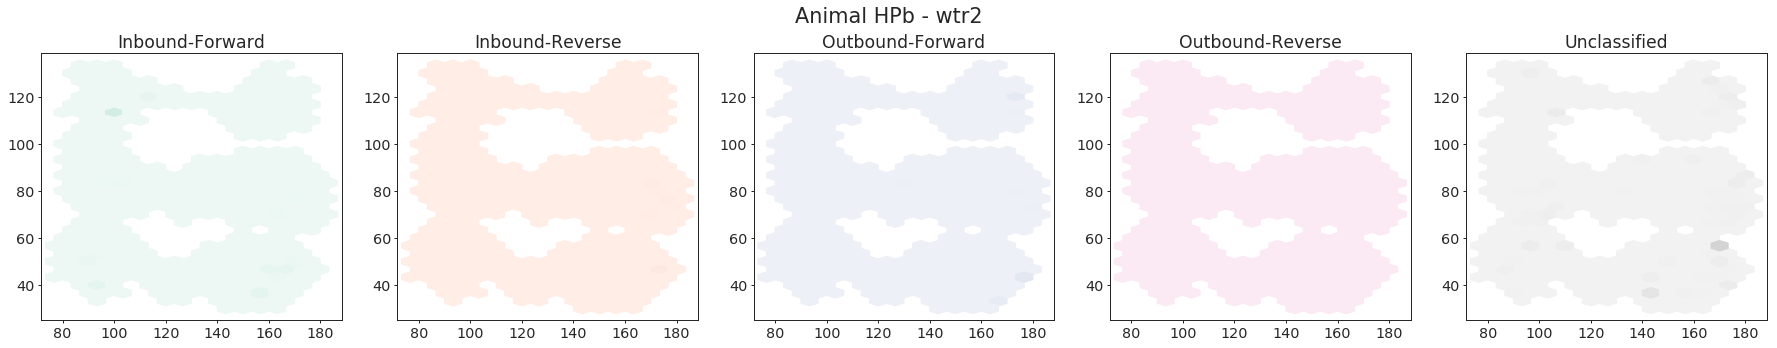

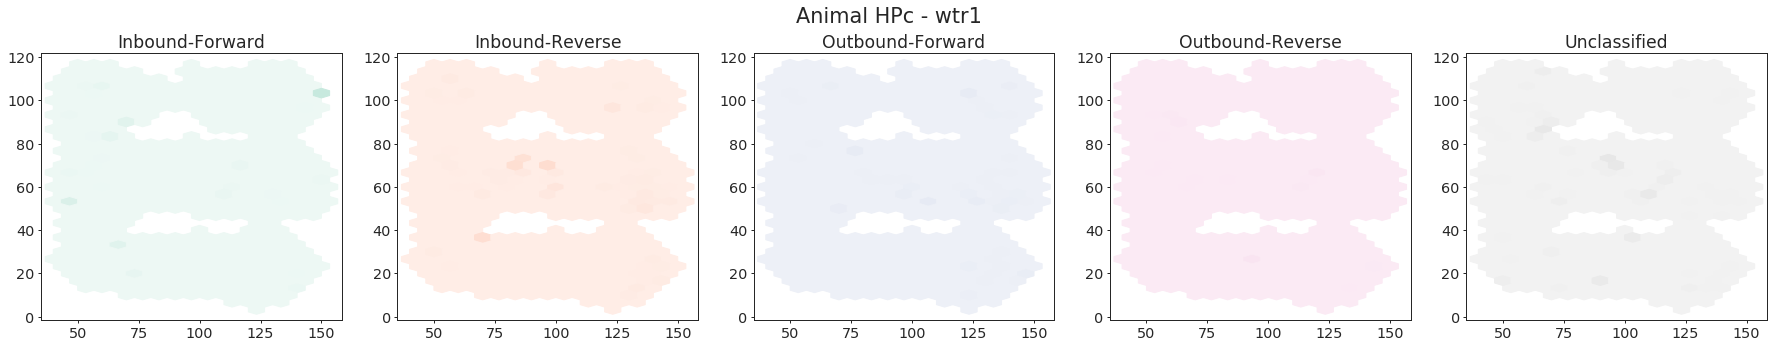

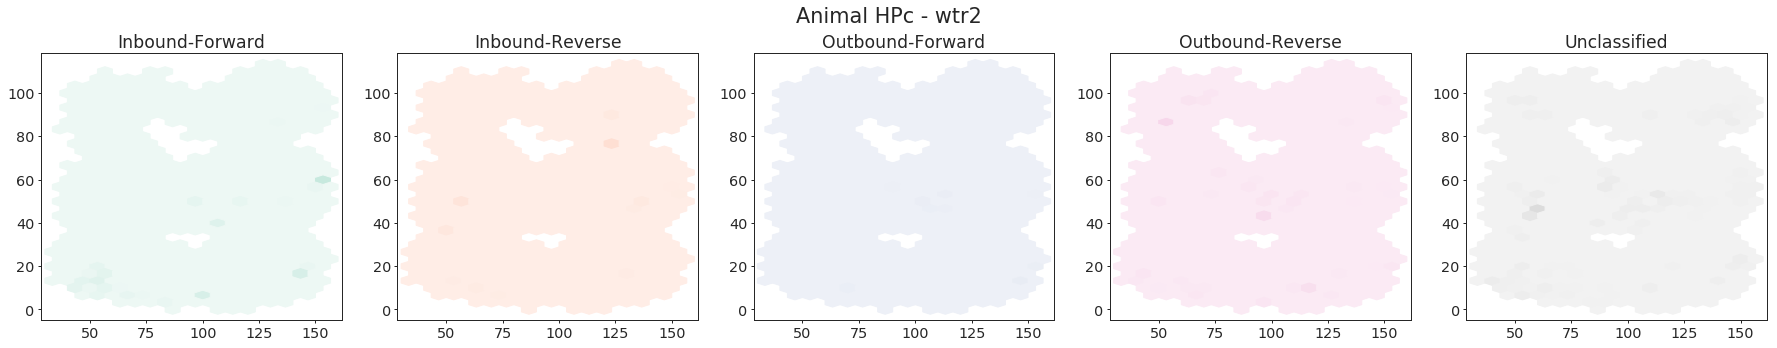

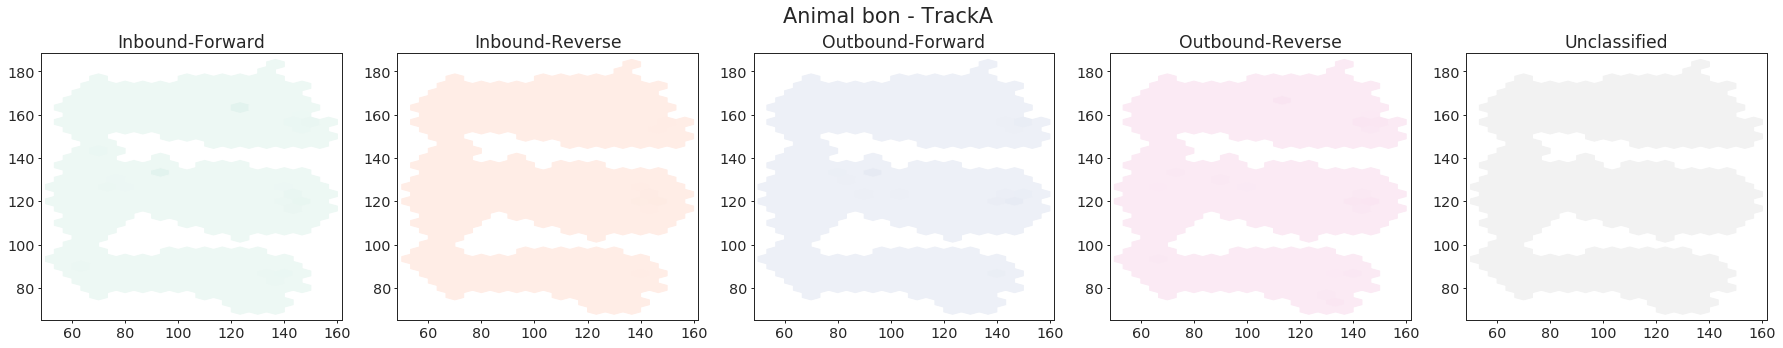

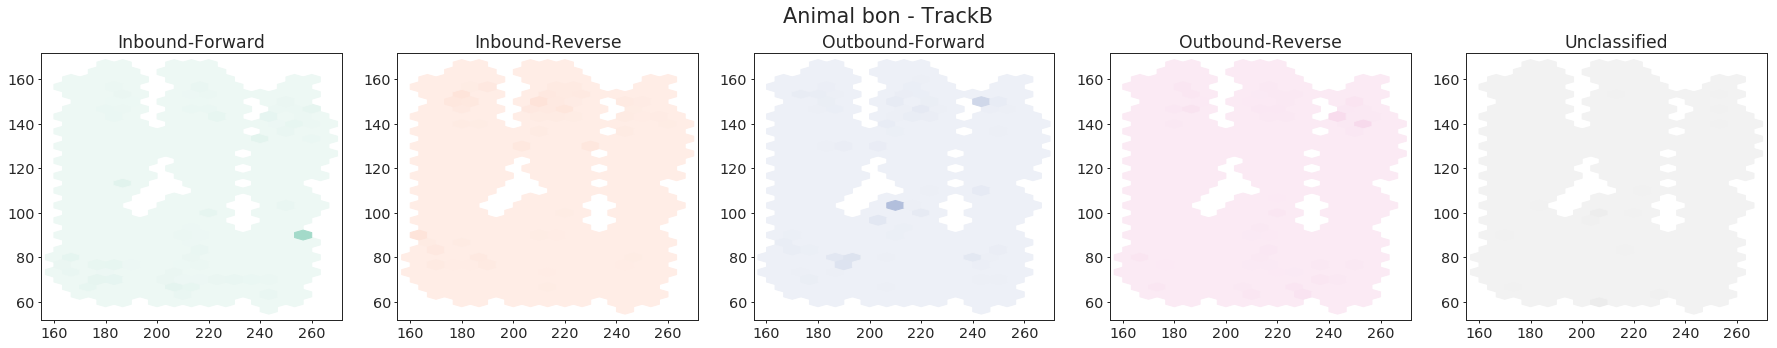

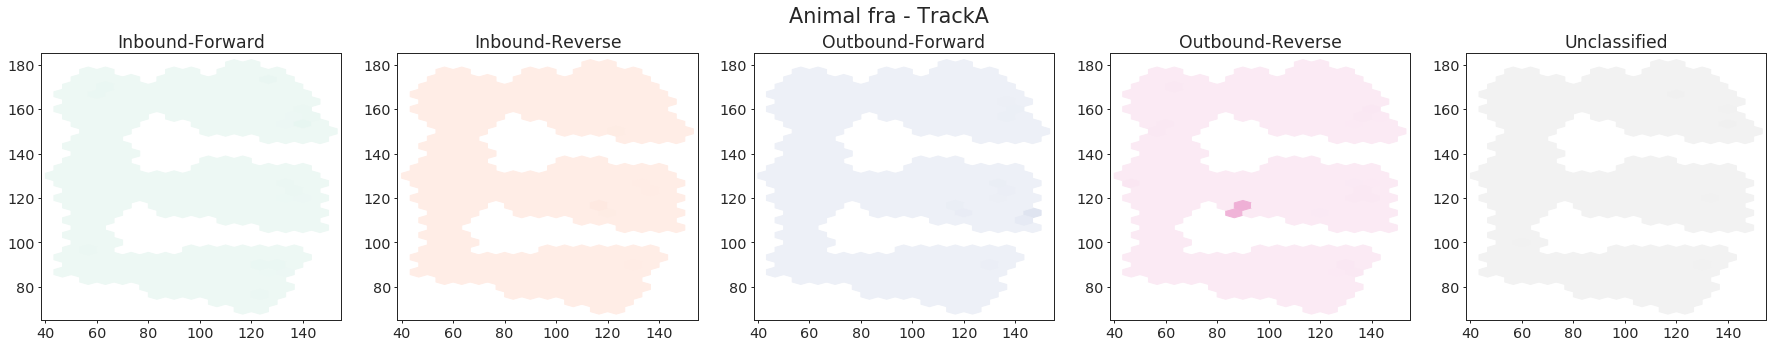

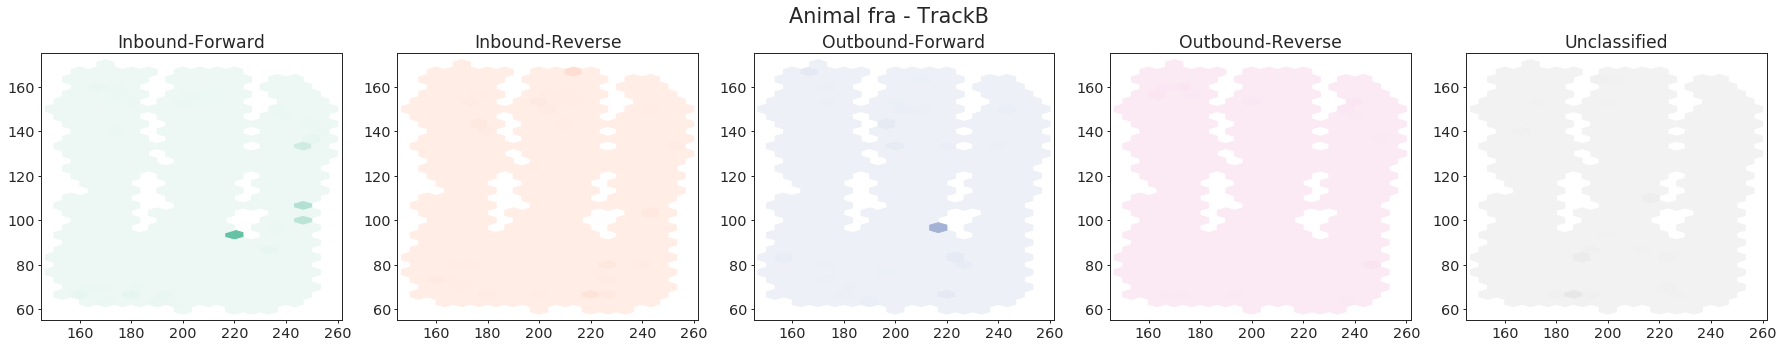

In [42]:
from src.parameters import GRIDSIZE, EXTENT, SAMPLING_FREQUENCY

covariate = 'predicted_state'
for name, group in replay_info.groupby(['animal', 'environment']):
    grouped = group.groupby(covariate)
    n_levels = len(grouped)
    fig, axes = plt.subplots(1, n_levels, figsize=(5 * n_levels, 5), sharex=True, sharey=True)
    occupancy = po.xs(name[:2]).reset_index().set_index(['center_x', 'center_y']).sort_index()
    for ax, (level, level_group) in zip(axes, grouped):
        event_count = ax.hexbin(level_group.x_position, level_group.y_position,
                                gridsize=GRIDSIZE, extent=EXTENT);
        ax.cla()
        event_count = pd.DataFrame(
                {'event_count': event_count.get_array(),
                 'center_x': event_count.get_offsets()[:, 0],
                 'center_y': event_count.get_offsets()[:, 1]}).set_index(['center_x', 'center_y']).sort_index()
        normalized_count = pd.concat((event_count, occupancy), axis=1).reset_index()
        normalized_count['normalized_count'] = (
            SAMPLING_FREQUENCY * normalized_count.event_count / normalized_count.occupancy_count)
        mappable = ax.hexbin(normalized_count.center_x, normalized_count.center_y,
                             C=normalized_count.normalized_count, gridsize=GRIDSIZE, extent=EXTENT,
                             cmap=sns.light_palette(COLORS[level], as_cmap=True), vmin=0, vmax=2)
#         ax.scatter(level_group.x_position, level_group.y_position, color='red', s=2)
        ax.set_title(level)
        xlim = np.percentile(
            normalized_count.center_x[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ylim = np.percentile(
            normalized_count.center_y[~np.isinf(normalized_count.normalized_count) &
                                      ~np.isnan(normalized_count.normalized_count)], [0, 100])
        ax.set_xlim(xlim + [-5, 5])
        ax.set_ylim(ylim + [-5, 5])
    fig.suptitle('Animal {0} - {1}'.format(*name))
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)